# Credit Risk Analysis

## Import packages

1. `sys`: System-specific parameters and functions.
2. `reload` (from `imp`): Reload previously imported modules.
3. `matplotlib.pyplot`: Data visualization.
4. `numpy`: Numerical computing.
5. `pandas`: Data manipulation and analysis.
6. `seaborn`: Statistical data visualization.
7. `SimpleImputer` (from `sklearn.impute`): Handling missing data.
8. `LogisticRegression` (from `sklearn.linear_model`): Logistic regression for classification.

In [344]:
import sys

sys.path.append("..")

from imp import reload

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectPercentile, chi2
import pickle
from helper_functions import config, data_utils, evaluation, plot
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

sys.path.append("..")

In [345]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

## Import data set

After importing the data set into Python, the `app_train` is now our data frame. The data frame has a lot of functions and methods that will create spesific outputs about the characteristic of data frame. The method of `columns` will print out all the column names.

In [346]:
reload(data_utils)
reload(config)

# Import data set
app_train, app_test, columns_description = data_utils.get_datasets()

/home/chris/Learning-2023/anyoneai_dir/endproj/credit-risk-analysis_chris/src/notebooks/../helper_functions/data_utils.py:60: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  app_train = pd.read_csv(config.DATASET_TRAIN, delimiter='\t', encoding='latin1', header=None)


## General Data Info

### Training set

In [347]:
# Columns
app_train.columns

Index(['ID_CLIENT', 'CLERK_TYPE', 'PAYMENT_DAY', 'APPLICATION_SUBMISSION_TYPE',
       'QUANT_ADDITIONAL_CARDS', 'POSTAL_ADDRESS_TYPE', 'SEX',
       'MARITAL_STATUS', 'QUANT_DEPENDANTS', 'EDUCATION_LEVEL',
       'STATE_OF_BIRTH', 'CITY_OF_BIRTH', 'NACIONALITY', 'RESIDENCIAL_STATE',
       'RESIDENCIAL_CITY', 'RESIDENCIAL_BOROUGH', 'FLAG_RESIDENCIAL_PHONE',
       'RESIDENCIAL_PHONE_AREA_CODE', 'RESIDENCE_TYPE', 'MONTHS_IN_RESIDENCE',
       'FLAG_MOBILE_PHONE', 'FLAG_EMAIL', 'PERSONAL_MONTHLY_INCOME',
       'OTHER_INCOMES', 'FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS',
       'FLAG_AMERICAN_EXPRESS', 'FLAG_OTHER_CARDS', 'QUANT_BANKING_ACCOUNTS',
       'QUANT_SPECIAL_BANKING_ACCOUNTS', 'PERSONAL_ASSETS_VALUE', 'QUANT_CARS',
       'COMPANY', 'PROFESSIONAL_STATE', 'PROFESSIONAL_CITY',
       'PROFESSIONAL_BOROUGH', 'FLAG_PROFESSIONAL_PHONE',
       'PROFESSIONAL_PHONE_AREA_CODE', 'MONTHS_IN_THE_JOB', 'PROFESSION_CODE',
       'OCCUPATION_TYPE', 'MATE_PROFESSION_CODE', 'EDUCATION_LEV

In [348]:
# Data dimension
print(
    "Data dimension: {} rows and {} columns".format(
        len(app_train), len(app_train.columns)
    )
)
app_train.head()

Data dimension: 50000 rows and 54 columns


,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,...,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1


### Testing data

In [349]:
app_test.columns

Index(['ID_CLIENT', 'CLERK_TYPE', 'PAYMENT_DAY', 'APPLICATION_SUBMISSION_TYPE',
       'QUANT_ADDITIONAL_CARDS', 'POSTAL_ADDRESS_TYPE', 'SEX',
       'MARITAL_STATUS', 'QUANT_DEPENDANTS', 'EDUCATION_LEVEL',
       'STATE_OF_BIRTH', 'CITY_OF_BIRTH', 'NACIONALITY', 'RESIDENCIAL_STATE',
       'RESIDENCIAL_CITY', 'RESIDENCIAL_BOROUGH', 'FLAG_RESIDENCIAL_PHONE',
       'RESIDENCIAL_PHONE_AREA_CODE', 'RESIDENCE_TYPE', 'MONTHS_IN_RESIDENCE',
       'FLAG_MOBILE_PHONE', 'FLAG_EMAIL', 'PERSONAL_MONTHLY_INCOME',
       'OTHER_INCOMES', 'FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS',
       'FLAG_AMERICAN_EXPRESS', 'FLAG_OTHER_CARDS', 'QUANT_BANKING_ACCOUNTS',
       'QUANT_SPECIAL_BANKING_ACCOUNTS', 'PERSONAL_ASSETS_VALUE', 'QUANT_CARS',
       'COMPANY', 'PROFESSIONAL_STATE', 'PROFESSIONAL_CITY',
       'PROFESSIONAL_BOROUGH', 'FLAG_PROFESSIONAL_PHONE',
       'PROFESSIONAL_PHONE_AREA_CODE', 'MONTHS_IN_THE_JOB', 'PROFESSION_CODE',
       'OCCUPATION_TYPE', 'MATE_PROFESSION_CODE', 'EDUCATION_LEV

In [350]:
# Data dimension
print(
    "Data dimension: {} rows and {} columns".format(
        len(app_test), len(app_test.columns)
    )
)
app_test.head()

Data dimension: 20000 rows and 53 columns


,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,...,EDUCATION_LEVEL,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3
0,70001,C,10,Web,NaN,1,F,1,0,5,...,NaN,0,0,0,0,2,N,29,318,318
1,70002,C,10,Web,NaN,1,F,1,0,3,...,2.0,0,0,0,0,2,N,41,173,173
2,70003,C,25,Web,NaN,1,F,2,0,4,...,NaN,0,0,0,0,1,N,38,716,716
3,70004,C,5,Web,NaN,1,F,1,0,3,...,NaN,0,0,0,0,1,N,45,869,869
4,70005,C,20,Web,NaN,1,F,1,0,4,...,NaN,0,0,0,0,1,N,49,289,289


### Columns descriptions data

In [351]:
columns_description

,Var_Title,Var_Description,Field_Content
Var_Id,,,
1,ID_CLIENT,Sequential number for the applicant (to be use...,"1-50000, 50001-70000, 70001-90000"
2,CLERK_TYPE,Not informed,C
3,PAYMENT_DAY,"Day of the month for bill payment, chosen by t...","1,5,10,15,20,25"
4,APPLICATION_SUBMISSION_TYPE,Indicates if the application was submitted via...,"Web, Carga"
5,QUANT_ADDITIONAL_CARDS,Quantity of additional cards asked for in the ...,"1,2,NULL"
6,POSTAL_ADDRESS_TYPE,Indicates if the address for posting is the ho...,1.2
7,SEX,NaN,"M=Male, F=Female"
8,MARITAL_STATUS,Encoding not informed,"1,2,3,4,5,6,7"
9,QUANT_DEPENDANTS,NaN,"0, 1, 2, ..."


The method of `info` will show us the metadata or information about the columns in a data frame. It undirectly specifies the scale measurement of a given columns in a data frame. However, it can be misleading. So, we must modify the scale measurement or column types based on column characteristic.

In [352]:
# Data frame metadata
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_CLIENT                       50000 non-null  int64  
 1   CLERK_TYPE                      50000 non-null  object 
 2   PAYMENT_DAY                     50000 non-null  int64  
 3   APPLICATION_SUBMISSION_TYPE     50000 non-null  object 
 4   QUANT_ADDITIONAL_CARDS          50000 non-null  int64  
 5   POSTAL_ADDRESS_TYPE             50000 non-null  int64  
 6   SEX                             50000 non-null  object 
 7   MARITAL_STATUS                  50000 non-null  int64  
 8   QUANT_DEPENDANTS                50000 non-null  int64  
 9   EDUCATION_LEVEL                 50000 non-null  int64  
 10  STATE_OF_BIRTH                  50000 non-null  object 
 11  CITY_OF_BIRTH                   50000 non-null  object 
 12  NACIONALITY                     

In [353]:
# Show number columns
app_train.select_dtypes(include="number").columns

Index(['ID_CLIENT', 'PAYMENT_DAY', 'QUANT_ADDITIONAL_CARDS',
       'POSTAL_ADDRESS_TYPE', 'MARITAL_STATUS', 'QUANT_DEPENDANTS',
       'EDUCATION_LEVEL', 'NACIONALITY', 'RESIDENCE_TYPE',
       'MONTHS_IN_RESIDENCE', 'FLAG_EMAIL', 'PERSONAL_MONTHLY_INCOME',
       'OTHER_INCOMES', 'FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS',
       'FLAG_AMERICAN_EXPRESS', 'FLAG_OTHER_CARDS', 'QUANT_BANKING_ACCOUNTS',
       'QUANT_SPECIAL_BANKING_ACCOUNTS', 'PERSONAL_ASSETS_VALUE', 'QUANT_CARS',
       'MONTHS_IN_THE_JOB', 'PROFESSION_CODE', 'OCCUPATION_TYPE',
       'MATE_PROFESSION_CODE', 'EDUCATION_LEVEL', 'FLAG_HOME_ADDRESS_DOCUMENT',
       'FLAG_RG', 'FLAG_CPF', 'FLAG_INCOME_PROOF', 'PRODUCT', 'AGE',
       'TARGET_LABEL_BAD=1'],
      dtype='object')

In [354]:
# Show not number columns
app_train.select_dtypes(exclude="number").columns

Index(['CLERK_TYPE', 'APPLICATION_SUBMISSION_TYPE', 'SEX', 'STATE_OF_BIRTH',
       'CITY_OF_BIRTH', 'RESIDENCIAL_STATE', 'RESIDENCIAL_CITY',
       'RESIDENCIAL_BOROUGH', 'FLAG_RESIDENCIAL_PHONE',
       'RESIDENCIAL_PHONE_AREA_CODE', 'FLAG_MOBILE_PHONE', 'COMPANY',
       'PROFESSIONAL_STATE', 'PROFESSIONAL_CITY', 'PROFESSIONAL_BOROUGH',
       'FLAG_PROFESSIONAL_PHONE', 'PROFESSIONAL_PHONE_AREA_CODE',
       'FLAG_ACSP_RECORD', 'RESIDENCIAL_ZIP_3', 'PROFESSIONAL_ZIP_3'],
      dtype='object')

In [355]:
# View 4 samples viewing all headers as a rows
app_train.T.iloc[:, :4]

,0,1,2,3
ID_CLIENT,1,2,3,4
CLERK_TYPE,C,C,C,C
PAYMENT_DAY,5,15,5,20
APPLICATION_SUBMISSION_TYPE,Web,Carga,Web,Web
QUANT_ADDITIONAL_CARDS,0,0,0,0
POSTAL_ADDRESS_TYPE,1,1,1,1
SEX,F,F,F,F
MARITAL_STATUS,6,2,2,2
QUANT_DEPENDANTS,1,0,0,0
EDUCATION_LEVEL,0,0,0,0


In [356]:
# Data frame metadata
app_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_CLIENT                       20000 non-null  int64  
 1   CLERK_TYPE                      20000 non-null  object 
 2   PAYMENT_DAY                     20000 non-null  int64  
 3   APPLICATION_SUBMISSION_TYPE     20000 non-null  object 
 4   QUANT_ADDITIONAL_CARDS          1273 non-null   float64
 5   POSTAL_ADDRESS_TYPE             20000 non-null  int64  
 6   SEX                             20000 non-null  object 
 7   MARITAL_STATUS                  20000 non-null  int64  
 8   QUANT_DEPENDANTS                20000 non-null  int64  
 9   EDUCATION_LEVEL                 20000 non-null  int64  
 10  STATE_OF_BIRTH                  20000 non-null  object 
 11  CITY_OF_BIRTH                   19990 non-null  object 
 12  NACIONALITY                     

#### Column Description data

- There are 2 columns with the same name "EDUCATION_LEVEL" 
- First is for general education level
- Second is for mate education level
- The second column aggregate with "MATE_EDUCATION_LEVEL"

In [357]:
metadata = columns_description

meta_cols = metadata["Var_Title"].to_list()
meta_cols[43] = "MATE_EDUCATION_LEVEL"

# Set the new column to the train_data and test_data
app_train.columns = meta_cols
app_test.columns = meta_cols[:-1]

#app_train["MATE_EDUCATION_LEVEL"].info()
#app_test["MATE_EDUCATION_LEVEL"].info()

In [358]:
# Sytle
sns.set_theme(style="ticks", palette="pastel")
sns.set(font_scale=0.8)

#### Distribution target column

   Value  Count  Percentage
0      0  36959      73.918
1      1  13041      26.082


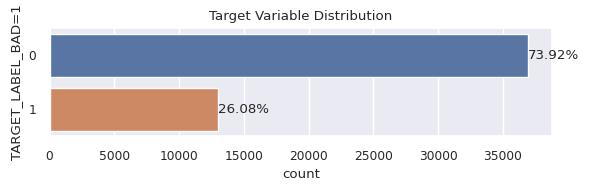

In [359]:
reload(plot)
plot.plot_target_variable_distribution(app_train, "TARGET_LABEL_BAD=1")

#### Distribution number of columns of each data type

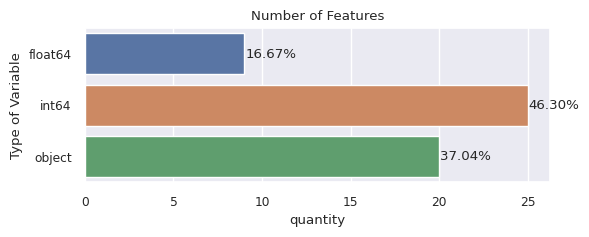

In [360]:
reload(plot)
plot.plot_data_type_counts(app_train)

#### Distribution of uniques values for categorical columns

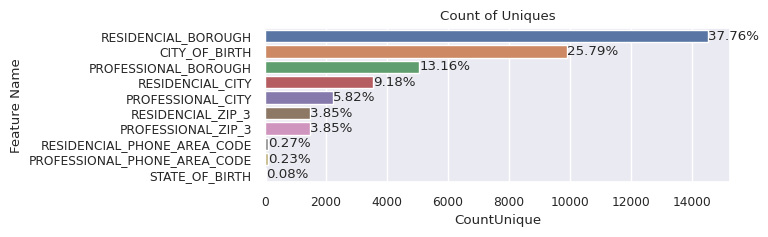

In [361]:
reload(plot)
plot.plot_unique_value_counts(app_train, )

#### Distribution percentage of missing data for each column

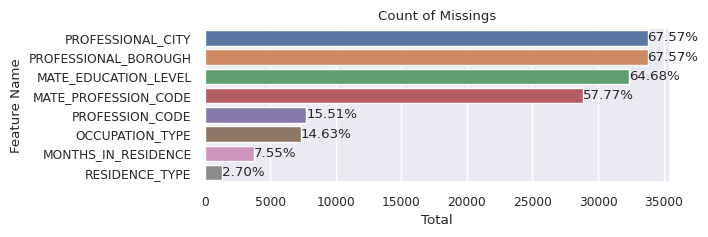

In [362]:
reload(plot)
plot.plot_missing_data(app_train,)

#### Handle missing values

In [363]:
plot.display_missing_values(app_train)

+----------------------+---------------+
|        Column        | Missing Count |
+----------------------+---------------+
|    RESIDENCE_TYPE    |     1349      |
| MONTHS_IN_RESIDENCE  |     3777      |
|  PROFESSIONAL_CITY   |     33783     |
| PROFESSIONAL_BOROUGH |     33783     |
|   PROFESSION_CODE    |     7756      |
|   OCCUPATION_TYPE    |     7313      |
| MATE_PROFESSION_CODE |     28884     |
| MATE_EDUCATION_LEVEL |     32338     |
+----------------------+---------------+


**Note**: Consideration to remove missing values is based on a business logic. The concept of *garbage in garbage out* applies. Without any relevant domain knowledges of loan problem, the interpolation will lead to the biased result.

Instead of dropping the missing values brutally, we try to inspect the relevant variables in the data in order to suggest the consideration for the next analysis

#### Analyzing distribution of variables
- Show distribution of credit amounts

* Analyzing PERSONAL_MONTHLY_INCOME
  * it is the applicant's personal regular monthly income in Brazilian currency (R$)
  * it will be cast to (dollars$)

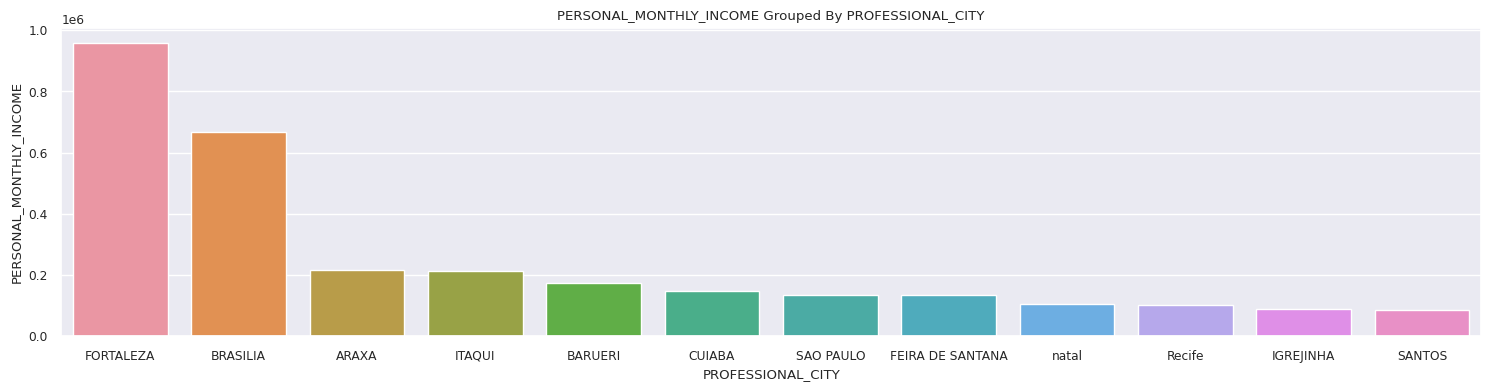

In [364]:
income_colname = "PERSONAL_MONTHLY_INCOME"
other_colname = "PROFESSIONAL_CITY"
df_order_by_income = app_train.sort_values(
    by=[income_colname], ascending=False, ignore_index=True
)
df_income_plot = df_order_by_income.loc[:30, [income_colname, other_colname]]

plt.figure(figsize=(15, 4))
plt.title(income_colname + " Grouped By " + other_colname)
sns.barplot(x=df_income_plot[other_colname], y=df_income_plot[income_colname])
plt.tight_layout()

#### Helper Functions

In [365]:
# functions to treats outliers
def trunc(valor, liminf, limsup):
    if valor < liminf:
        return liminf
    if valor > limsup:
        return limsup
    if valor > liminf and valor < limsup:
        return valor


def compute_limits(df, field):
    q1 = np.percentile(df[field], 25)
    q3 = np.percentile(df[field], 75)
    iqr = q3 - q1
    limsup = q3 + 1.5 * iqr
    liminf = q1 - 1.5 * iqr
    return liminf, limsup


def plot_outliers(df, field):
    fig, axs = plt.subplots(1, 2, figsize=(10, 2))
    sns.boxplot(x=df[field], ax=axs[0])
    sns.boxplot(x=df["new" + field], ax=axs[1])


def proc_outliers(df, field):
    # impute nans with mean value of column
    df[field].replace({np.nan: df[field].mean()}, inplace=True)

    # compute quantiles
    liminf, limsup = compute_limits(df, field)

    # apply truncated function
    df["new" + field] = df[field].apply(lambda val: trunc(val, liminf, limsup))

    # plot before and after of correct outliers
    plot_outliers(df, field)

    # update dataframe
    df[field] = df["new" + field]
    df.drop(["new" + field], axis=1, inplace=True)

In [366]:
# mapping meta_colname to idx
metadata_dic = {colname: idx for idx, colname in enumerate(meta_cols)}
print(metadata_dic)

{'ID_CLIENT': 0, 'CLERK_TYPE': 1, 'PAYMENT_DAY': 2, 'APPLICATION_SUBMISSION_TYPE': 3, 'QUANT_ADDITIONAL_CARDS': 4, 'POSTAL_ADDRESS_TYPE': 5, 'SEX': 6, 'MARITAL_STATUS': 7, 'QUANT_DEPENDANTS': 8, 'EDUCATION_LEVEL': 9, 'STATE_OF_BIRTH': 10, 'CITY_OF_BIRTH': 11, 'NACIONALITY': 12, 'RESIDENCIAL_STATE': 13, 'RESIDENCIAL_CITY': 14, 'RESIDENCIAL_BOROUGH': 15, 'FLAG_RESIDENCIAL_PHONE': 16, 'RESIDENCIAL_PHONE_AREA_CODE': 17, 'RESIDENCE_TYPE': 18, 'MONTHS_IN_RESIDENCE': 19, 'FLAG_MOBILE_PHONE': 20, 'FLAG_EMAIL': 21, 'PERSONAL_MONTHLY_INCOME': 22, 'OTHER_INCOMES': 23, 'FLAG_VISA': 24, 'FLAG_MASTERCARD': 25, 'FLAG_DINERS': 26, 'FLAG_AMERICAN_EXPRESS': 27, 'FLAG_OTHER_CARDS': 28, 'QUANT_BANKING_ACCOUNTS': 29, 'QUANT_SPECIAL_BANKING_ACCOUNTS': 30, 'PERSONAL_ASSETS_VALUE': 31, 'QUANT_CARS': 32, 'COMPANY': 33, 'PROFESSIONAL_STATE': 34, 'PROFESSIONAL_CITY': 35, 'PROFESSIONAL_BOROUGH': 36, 'FLAG_PROFESSIONAL_PHONE': 37, 'PROFESSIONAL_PHONE_AREA_CODE': 38, 'MONTHS_IN_THE_JOB': 39, 'PROFESSION_CODE': 40, 

In [367]:
# show list of types of variables
number_field_names = app_train.select_dtypes("number").columns.to_list()
category_field_names = app_train.select_dtypes(exclude="number").columns.to_list()

print(number_field_names)
print(category_field_names)

['ID_CLIENT', 'PAYMENT_DAY', 'QUANT_ADDITIONAL_CARDS', 'POSTAL_ADDRESS_TYPE', 'MARITAL_STATUS', 'QUANT_DEPENDANTS', 'EDUCATION_LEVEL', 'NACIONALITY', 'RESIDENCE_TYPE', 'MONTHS_IN_RESIDENCE', 'FLAG_EMAIL', 'PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES', 'FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS', 'FLAG_OTHER_CARDS', 'QUANT_BANKING_ACCOUNTS', 'QUANT_SPECIAL_BANKING_ACCOUNTS', 'PERSONAL_ASSETS_VALUE', 'QUANT_CARS', 'MONTHS_IN_THE_JOB', 'PROFESSION_CODE', 'OCCUPATION_TYPE', 'MATE_PROFESSION_CODE', 'MATE_EDUCATION_LEVEL', 'FLAG_HOME_ADDRESS_DOCUMENT', 'FLAG_RG', 'FLAG_CPF', 'FLAG_INCOME_PROOF', 'PRODUCT', 'AGE', 'TARGET_LABEL_BAD=1']
['CLERK_TYPE', 'APPLICATION_SUBMISSION_TYPE', 'SEX', 'STATE_OF_BIRTH', 'CITY_OF_BIRTH', 'RESIDENCIAL_STATE', 'RESIDENCIAL_CITY', 'RESIDENCIAL_BOROUGH', 'FLAG_RESIDENCIAL_PHONE', 'RESIDENCIAL_PHONE_AREA_CODE', 'FLAG_MOBILE_PHONE', 'COMPANY', 'PROFESSIONAL_STATE', 'PROFESSIONAL_CITY', 'PROFESSIONAL_BOROUGH', 'FLAG_PROFESSIONAL_PHONE', 'PRO

In [368]:
# get indices from numerical columns using metadata to index mapping
idxs_number_cols = [
    metadata_dic[number_colname] for number_colname in number_field_names
]

In [369]:
# showing metadata info
metadata.iloc[idxs_number_cols, [0, 2]]

,Var_Title,Field_Content
Var_Id,,
1,ID_CLIENT,"1-50000, 50001-70000, 70001-90000"
3,PAYMENT_DAY,"1,5,10,15,20,25"
5,QUANT_ADDITIONAL_CARDS,"1,2,NULL"
6,POSTAL_ADDRESS_TYPE,1.2
8,MARITAL_STATUS,"1,2,3,4,5,6,7"
9,QUANT_DEPENDANTS,"0, 1, 2, ..."
10,EDUCATION_LEVEL,"1,2,3,4,5"
13,NACIONALITY,"0, 1, 2"
19,RESIDENCE_TYPE,"1,2,3,4,5,NULL"


#### Show unique values from numerical columns

In [370]:
print("{:<32}{:<15}{}\n".format("Feature Name", "UniqueCount", "RangeMeta"))
for number_field in number_field_names:
    print(
        "{:<32}{:<15}{}".format(
            number_field,
            len(app_train[number_field].unique()),
            metadata.iloc[metadata_dic[number_field], 2],
        )
    )

Feature Name                    UniqueCount    RangeMeta

ID_CLIENT                       50000          1-50000, 50001-70000, 70001-90000
PAYMENT_DAY                     6              1,5,10,15,20,25
QUANT_ADDITIONAL_CARDS          1              1,2,NULL
POSTAL_ADDRESS_TYPE             2              1.2
MARITAL_STATUS                  8              1,2,3,4,5,6,7
QUANT_DEPENDANTS                17             0, 1, 2, ...
EDUCATION_LEVEL                 1              1,2,3,4,5
NACIONALITY                     3              0, 1, 2
RESIDENCE_TYPE                  7              1,2,3,4,5,NULL
MONTHS_IN_RESIDENCE             89             1,2,... , NULL
FLAG_EMAIL                      2              0.1
PERSONAL_MONTHLY_INCOME         5495           nan
OTHER_INCOMES                   615            nan
FLAG_VISA                       2              0.1
FLAG_MASTERCARD                 2              0.1
FLAG_DINERS                     2              0.1
FLAG_AMERICAN_EXPRESS       

#### Helper Functions

In [371]:
def apply_patches_with_probs(ax, stats,end_idx,init_idx=0,space=0.01,fs=10):
    allpatches = [patch for patch in ax.patches if patch.get_height() > 0]
    range_patches = allpatches[init_idx:end_idx]
    
    for i,patch in enumerate(range_patches):
        
        if(patch.get_height()>0):
            x = patch.get_x() + patch.get_width() / 2
            y = patch.get_height() + space
            ax.annotate("{:.2f}%".format(stats[i]), (x, y), ha="center",fontsize=fs)

# get percentages by target label
def get_percents_by_target_p(values_on_target):
    probs_on_target =  values_on_target.value_counts().sort_index()/len(values_on_target)
    return probs_on_target.to_list()


def plotting_histogram_target_one(col_name, features, target_col):
    plt.figure(figsize=(8, 3))
    plt.title("Histogram of " + col_name +" by Target")
    #fig.align_labels()

    #first label of target
    features_good = features[features[target_col]==0]
    features_bad = features[features[target_col]==1]

    ax0 = sns.histplot(
        data=features,
        x=col_name,
        hue=target_col,
        hue_order=[1,0],
        discrete=True,
        stat="probability",
        multiple="dodge",
        common_norm=False,
        shrink=0.8
    )
    
    probs_good = get_percents_by_target_p(features_good[col_name])
    probs_bad = get_percents_by_target_p(features_bad[col_name])

    max_prob_good = np.max(probs_good)
    max_prob_bad = np.max(probs_bad)
    max_prob = max(max_prob_good,max_prob_bad)
    
    apply_patches_with_probs(ax0,probs_good,end_idx=len(probs_good),init_idx=0,space=0.01,fs=8)
    apply_patches_with_probs(ax0,probs_bad,end_idx=2*len(probs_good),init_idx=len(probs_good),space=0.01,fs=8)

    ax0.set_ylabel("Probability")
    padding_factor=0.1
    ax0.set_ylim(top=max_prob+padding_factor)
    plt.legend(["Good","Bad"])
    plt.tight_layout()
    plt.show()


def plotting_histogram_target_split(col_name, features, target_col):
    fig,ax = plt.subplots(2,1,figsize=(8, 4))
    fig.suptitle("Histogram of " + col_name +" by Target")
    fig.align_labels()

    #first label of target
    features_good = features[features[target_col]==0]
    features_bad = features[features[target_col]==1]

    sns.histplot(ax=ax[0],data=features_good,x=col_name,discrete=True,stat="probability",label="Good")
    sns.histplot(ax=ax[1],data=features_bad, x=col_name,discrete=True,stat="probability",label="Bad",color="indianred")
    
    probs_good = get_percents_by_target_p(features_good[col_name])
    probs_bad = get_percents_by_target_p(features_bad[col_name])

    max_prob_good = np.max(probs_good)
    max_prob_bad = np.max(probs_bad)

    apply_patches_with_probs(ax[0],probs_good,end_idx=len(probs_good),init_idx=0,space=0.01,fs=11)
    apply_patches_with_probs(ax[1],probs_bad,end_idx=len(probs_bad),init_idx=0,space=0.01,fs=11)

    ax[0].set_ylabel("Probability")
    ax[1].set_ylabel("Probability")
    padding_factor=0.5
    ax[0].set_ylim(top=max_prob_good+padding_factor)
    ax[1].set_ylim(top=max_prob_bad+padding_factor)
    ax[0].legend()
    ax[1].legend()
    plt.tight_layout()
    plt.show()


In [372]:
# function to plot distribution of numerical feature
def plotting_general_histogram(col_name, data,type="Train"):
    plt.figure(figsize=(8, 3))
    plt.title("General Histogram of " + col_name + " in "+ type)

    ax = sns.histplot(data=data,x=col_name, discrete=True,stat="probability",fill=True)
    probs = []
    for patch in ax.patches:
        probs.append(patch.get_height())
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_height() + 0.01
        ax.annotate("{:.2f}%".format(patch.get_height()), (x, y), ha="center",fontsize=10)
    padding_factor=0.2
    max_prob = np.max(probs)
    ax.set_ylim(top=max_prob+padding_factor)
    plt.tight_layout()
    plt.show()

In [373]:
# plotting counting values of categorical columns
def plot_value_counts(fig, axes, col_name, train, test, col_percents, target_col):
    fig.suptitle("Value Counts of " + col_name)
    fig.align_labels()
    sns.countplot(
        ax=axes[0],
        data=train,
        y=col_name,
        hue=target_col,
        palette=sns.color_palette("ch:s=-.2,r=.6", n_colors=5),
    )

    plot.percented_patches_second(axes[0], col_percents)
    sns.color_palette("rocket", as_cmap=True)
    sns.countplot(
        ax=axes[1],
        data=test,
        y=col_name,
        palette=sns.color_palette("rocket_r", n_colors=5),
    )
    axes[0].set_xlabel("Train")
    axes[1].set_xlabel("Test")
    axes[0].legend(
        title="Target", labels=["Bad", "Good"], loc="upper left", bbox_to_anchor=(1, 1)
    )
    axes[0].set_ylabel("")
    axes[1].set_ylabel("")
    plt.tight_layout()
    plt.show()
    plt.close(fig)

In [374]:
# function to cast numerical/object to category feature
def cast_to_category(col_name, train, test):
    train[col_name] = train[col_name].astype("category")
    test[col_name] = test[col_name].astype("category")
    print("datatype train of " + col_name + ": " + str(train[col_name].dtype))
    print("datatype test of " + col_name + ": " + str(test[col_name].dtype))

In [375]:
# create temporal column on dataframe
def create_tmp_column(col_name, train, test):
    # copy current column to temporal column
    temp_col = col_name + "tmp"
    train[temp_col] = train[col_name]
    test[temp_col] = test[col_name]
    return temp_col

In [376]:
# remove temporal column on dataframe
def remove_tmp_column(col_name, train, test):
    train.drop([col_name], axis=1, inplace=True)
    test.drop([col_name], axis=1, inplace=True)

In [377]:
# get percentages by target label
def get_percents_by_target(col_name, train, target_col):
    target_good = train[train[target_col] == 0][col_name]
    target_bad = train[train[target_col] == 1][col_name]
    
    good_vars = np.array(target_good.value_counts().values)
    bad_vars = np.array(target_bad.value_counts().values)

    matrix_targets = np.vstack((good_vars, bad_vars))
    matrix_targets_sum = np.sum(matrix_targets, axis=0)
    # good_sum = np.sum(good_vars) * np.ones((3))
    # bad_sum = np.sum(bad_vars) * np.ones((3))

    lenght_cat_vars = len(good_vars)
    percents_labels = []
    if lenght_cat_vars != 1:
        good_perc = good_vars / matrix_targets_sum
        bad_perc = bad_vars / matrix_targets_sum
        percents_labels = np.append(good_perc, bad_perc)
    else:
        good_perc = target_good.value_counts().values / (
            len(target_good) + len(target_bad)
        )
        bad_perc = target_bad.value_counts().values / (
            len(target_good) + len(target_bad)
        )
        percents_labels.append(good_perc[0])
        percents_labels.append(bad_perc[0])
    return percents_labels



## Exploratory Data Analysis (EDA)

### Feature Engineering

##### Cleaning Data

In [378]:
# cloning app_train
target_col = "TARGET_LABEL_BAD=1"
app_train_cop = app_train.copy()
app_test_cop = app_test.copy()

#### Working on Numerical Data

In [379]:
# Column: ID_CLIENT

# delete ID_CLIENT because it is only an index
curr_col_name = "ID_CLIENT"

app_train_cop.drop(columns=[curr_col_name], inplace=True)
app_test_cop.drop(columns=[curr_col_name], inplace=True)

number_field_names = app_train.select_dtypes(include="number").columns.to_list()
number_field_names.remove(curr_col_name)

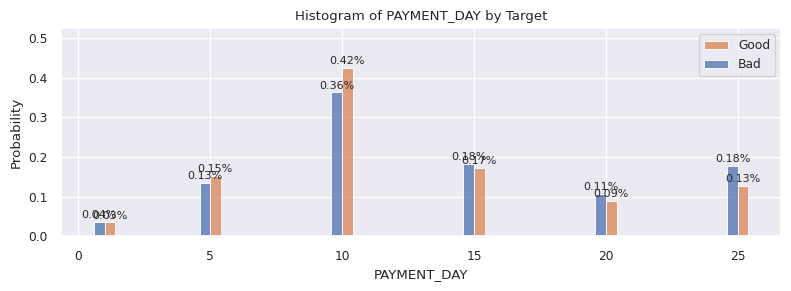

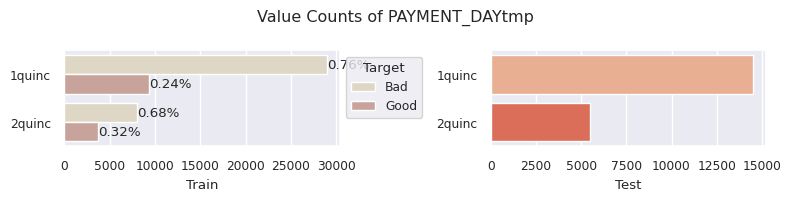

In [380]:
#'PAYMENT_DAY' : split every 15 days
# {0: "1quincena", 1:"2quincena"}
curr_col_name = "PAYMENT_DAY"
tmp_col = curr_col_name + "tmp"
# before of cleaning
plotting_histogram_target_one(curr_col_name, app_train_cop, target_col)

bins = [0, 15, 30]
numerical = [0, 1]
category = ["1quinc", "2quinc"]
# categorical changes
app_train_cop[tmp_col] = pd.cut(app_train_cop[curr_col_name], bins, labels=category)
app_test_cop[tmp_col] = pd.cut(app_test_cop[curr_col_name], bins, labels=category)

percents_by_target = get_percents_by_target(tmp_col, app_train_cop, target_col)
fig, axes = plt.subplots(1, 2, figsize=(8, 2))
plot_value_counts(
    fig, axes, tmp_col, app_train_cop, app_test_cop, percents_by_target, target_col
)

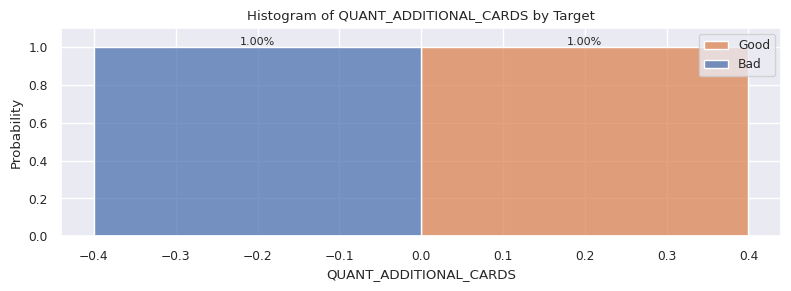

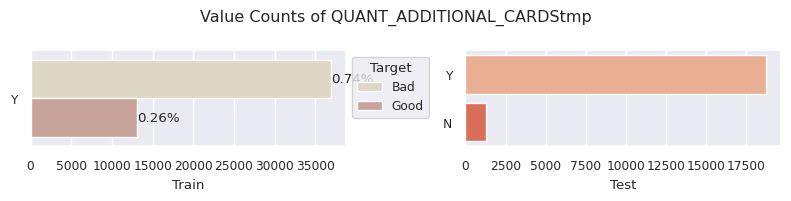

In [381]:
#'QUANT_ADDITIONAL_CARDS' tiene solo un valor (0), se puede eliminar.
# idea: colocar como binario si tiene o no tiene una tarjeta adicional
# se reemplazaran tanto en test con el valor mas frequente de toda
# la distribucion (train + test), valor_frecuente = 0 (sin tarjeta)
# sigue siendo variable numerica
curr_col_name = "QUANT_ADDITIONAL_CARDS"
tmp_col = curr_col_name + "tmp"
# before of cleaning
plotting_histogram_target_one(curr_col_name, app_train_cop, target_col)

# categorical changes

# cast to binary numerical categories {0: have a card, 1: don't have a card}
app_train_cop[tmp_col] = np.where(app_train_cop[curr_col_name] > 0, "N", "Y")
app_test_cop[tmp_col] = np.where(app_test_cop[curr_col_name] > 0, "N", "Y")

# impute nans in testing with 0 (most frequent from train)
imp_const_zero = SimpleImputer(
    missing_values=np.nan, strategy="constant", fill_value="Y"
)
app_test_cop[tmp_col] = imp_const_zero.fit_transform(app_test_cop[[tmp_col]]).ravel()

percents_by_target = get_percents_by_target(tmp_col, app_train_cop, target_col)
fig, axes = plt.subplots(1, 2, figsize=(8, 2))
plot_value_counts(
    fig, axes, tmp_col, app_train_cop, app_test_cop, percents_by_target, target_col
)

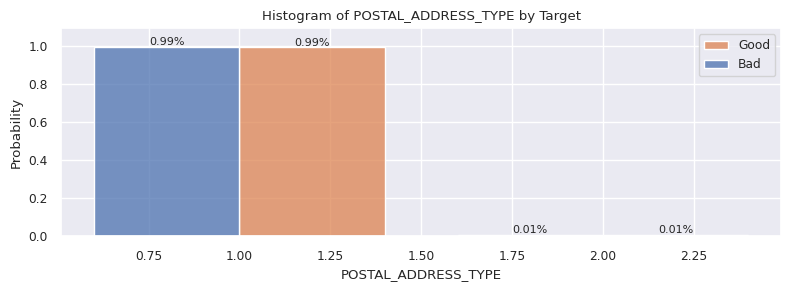

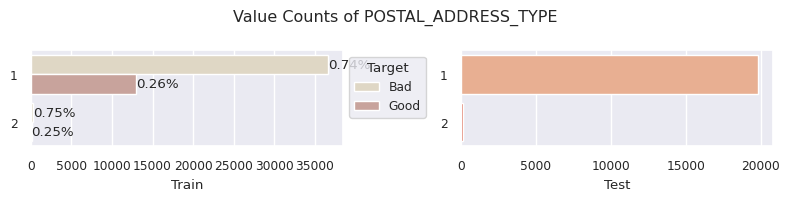

In [382]:
#'POSTAL_ADDRESS_TYPE' tiene (1=49673, 2=327) (don't apply changes) (REMOVED)
# se puede eliminar por la disparidad de valores.
# keep values it could be deleted after of seeing feature importances
curr_col_name = "POSTAL_ADDRESS_TYPE"
# before of cleaning
plotting_histogram_target_one(curr_col_name, app_train_cop, target_col)
percents_by_target = get_percents_by_target(curr_col_name, app_train_cop, target_col)
fig, axes = plt.subplots(1, 2, figsize=(8, 2))
plot_value_counts(
    fig,
    axes,
    curr_col_name,
    app_train_cop,
    app_test_cop,
    percents_by_target,
    target_col,
)

In [383]:
# view the relation between age and marital status
# in order to set what is every code of marital status
curr_col_name = "MARITAL_STATUS"
print("Relationship between Age and Marital Status")
app_train_cop[["AGE", curr_col_name]].groupby([curr_col_name]).median()
# conclude marital status by year
# it has 35 years old -> single (a single person has few years old)
# it has 42 years old -> married (a married person has more years old)

Relationship between Age and Marital Status


,AGE
MARITAL_STATUS,
0,38.0
1,35.0
2,42.0
3,50.0
4,62.0
5,48.0
6,35.0
7,48.0


##### Marital Status Code in Brazil
- regards to this [standard](https://international.ipums.org/international-action/variables/MARST#codes_section)

|code|marital status|
|---|---------------|
|0| NIU (not in universe)|
|1|	Single/never married *|	
|2|	Married/in union *|
|3|	Separated/divorced/spouse absent|
|4|	Widowed|

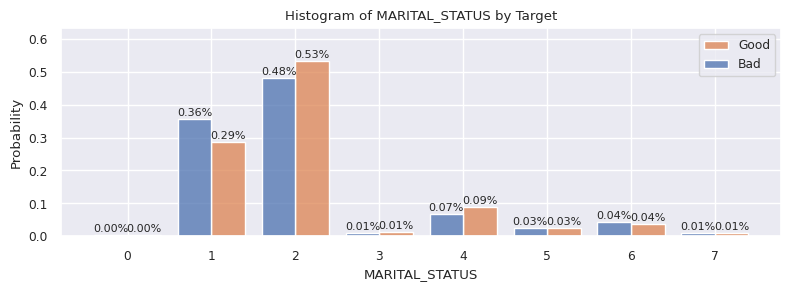

In [384]:
#'MARITAL_STATUS' tiene números del 0 al 7,
# la mayoría están concentrados en (1=15286, 2=25967),
# los otros números podemos codificarlo como indeterminado
# para no eliminar esta columnas.
curr_col_name = "MARITAL_STATUS"
# {single:1, married: 2, rest:3}
tmp_col = curr_col_name + "tmp"
# before of cleaning
plotting_histogram_target_one(curr_col_name, app_train_cop, target_col)
# categorical changes
app_train_cop[tmp_col] = np.where(
    app_train_cop[curr_col_name] == 1,
    "single",
    np.where(app_train_cop[curr_col_name] == 2, "married", "Other"),
)
app_test_cop[tmp_col] = np.where(
    app_test_cop[curr_col_name] == 1,
    "single",
    np.where(app_test_cop[curr_col_name] == 2, "married", "Other"),
)
# percents_by_target = get_percents_by_target(tmp_col, app_train_cop, target_col)
# fig, axes = plt.subplots(1, 2, figsize=(8, 2))
# plot_value_counts(
#     fig, axes, tmp_col, app_train_cop, app_test_cop, percents_by_target, target_col
# )

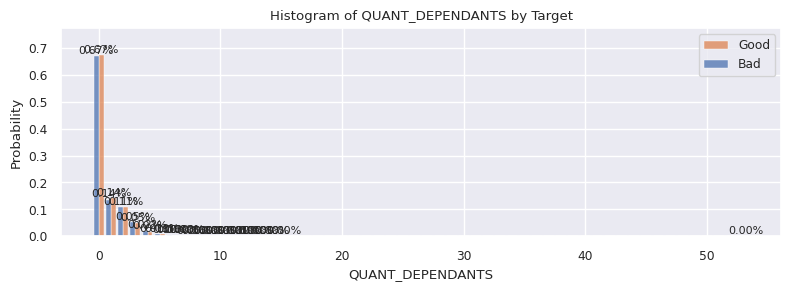

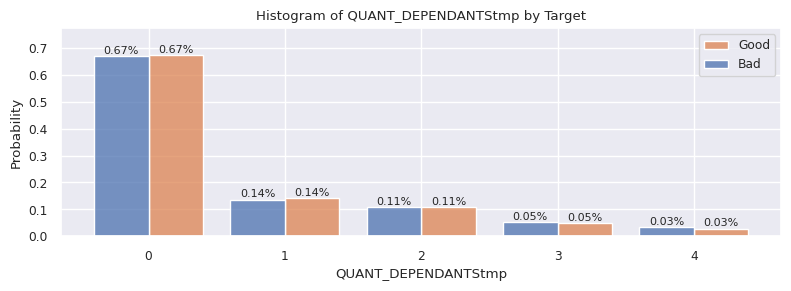

In [385]:
# 'QUANT_DEPENDANTS' tiene números de 0 hasta el 13 y el 53,
# podemos clasificar con si y no, o en 0, 1, 2, 3 y 4+.
# summarizing, in range[0,1,2,3,4+]
# there exist a scale dependence between every numeric value
# so it keeps as a numerical value
curr_col_name = "QUANT_DEPENDANTS"
# before of cleaning
plotting_histogram_target_one(curr_col_name, app_train_cop, target_col)
# numerrical changes
tmp_col = create_tmp_column(curr_col_name, app_train_cop, app_test_cop)
app_train_cop.loc[app_train_cop[curr_col_name] > 4, tmp_col] = 4
app_test_cop.loc[app_test_cop[curr_col_name] > 4, tmp_col] = 4
plotting_histogram_target_one(tmp_col, app_train_cop, target_col)

##### Education System in Brazil coding

- start from Tertiary education

|   | Education | School/Level                           | Years |
|---|-----------|----------------------------------------|:-----:|
| - | Primary   | Ensino Fundamental (Elementary School) |   9   |
| 0 | Secondary | Ensino Médio (High School)             |   3   |
| 1 | Tertiary  | Higher Education- Ensino Superior      |       |
| 2 | Tertiary  | Bacharelado, Licenciado (Undergrad.)   |  4–6  |
| 3 | Tertiary  | Especialização (Graduate)              |   1   |
| 4 | Tertiary  | Mestre (Graduate)                      |  1–2  |
| 5 | Tertiary  | Doutor (Doctoral)                      |   2   |

[Education System in Brazil](https://www.scholaro.com/db/countries/brazil/education-system)

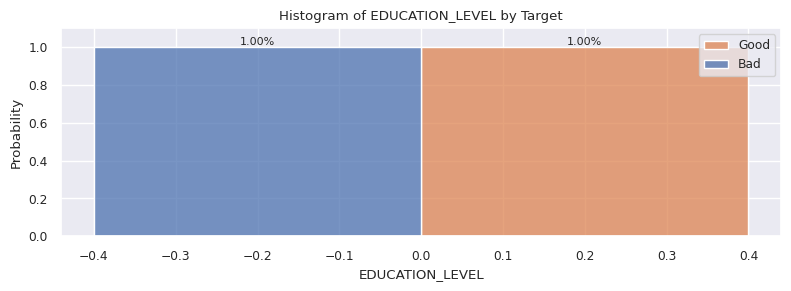

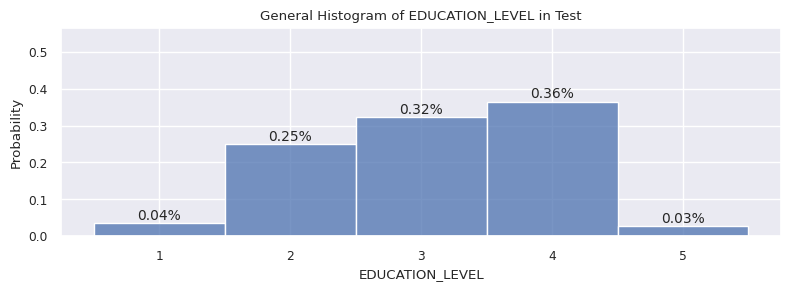

In [386]:
#'EDUCATION_LEVEL' solo tiene un numero 0, se puede eliminar. (REMOVED)
# 5 Profesional Education o 1
# 0:secundaria completa, 1:tienen estudios superiores
# there exist a scale dependence between every numeric value
# so it keeps as a numerical value
# the problem is match MATE EDUCATION LEVEL
# we don't know exactly the respective code, when predict
# and use an wrong code it could add bias to the result
# of the model so it will be remove
curr_col_name = "EDUCATION_LEVEL"
# before of cleaning
plotting_histogram_target_one(curr_col_name, app_train_cop, target_col)
plotting_general_histogram(curr_col_name, app_test_cop,type="Test")

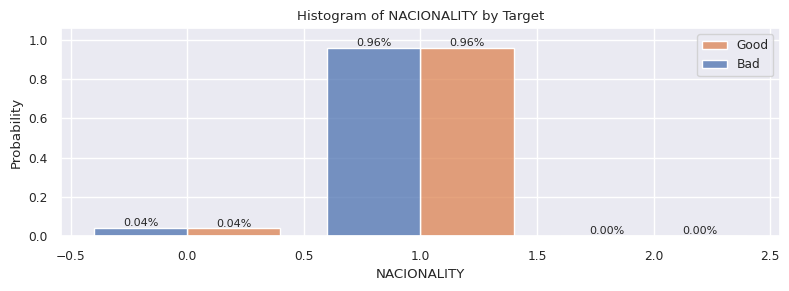

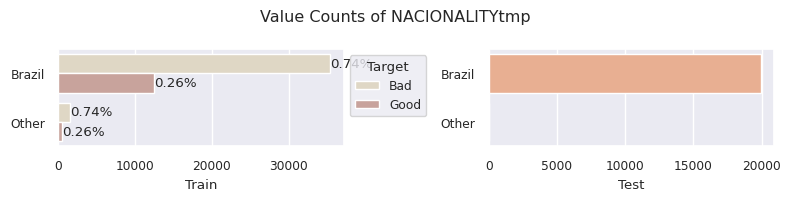

In [387]:
# 'NATIONALITY' los valores que tiene son (2=98, 0=2018, 1=47884) (REMOVED)
# se puede eliminar por la disparidad de valores.
# debe ser categorico y sera brazil:1 otros:2

curr_col_name = "NACIONALITY"  # correct translation -> NATIONALITY
tmp_col = curr_col_name + "tmp"
# before of cleaning
plotting_histogram_target_one(curr_col_name, app_train_cop, target_col)

# categorical changes
app_train_cop[tmp_col] = np.where(app_train_cop[curr_col_name] == 1, "Brazil", "Other")
app_test_cop[tmp_col] = np.where(app_test_cop[curr_col_name] == 1, "Brazil", "Other")
percents_by_target = get_percents_by_target(tmp_col, app_train_cop, target_col)
fig, axes = plt.subplots(1, 2, figsize=(8, 2))
plot_value_counts(
    fig, axes, tmp_col, app_train_cop, app_test_cop, percents_by_target, target_col
)

|code|Residence Type|
|---|---|
|0|otros|
|1|owned|
|2|mortgage|
|3|rented|
|4|parents|
|5|family|

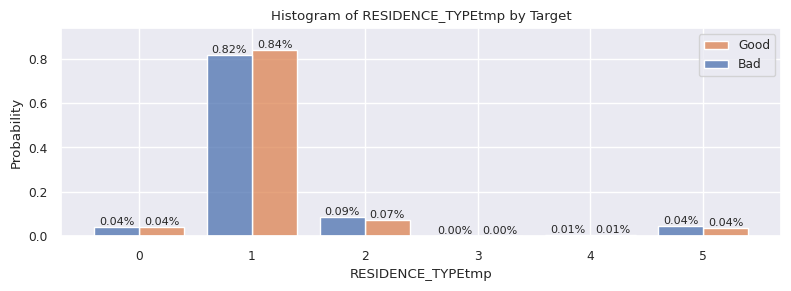

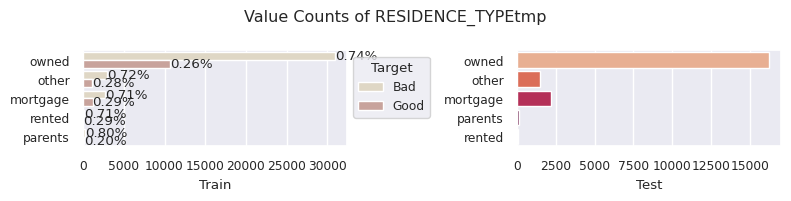

In [388]:
# 'RESIDENCE_TYPE' tiene valores del 0 hasta el 5,
# el de mayor proporcion es el 1 con 41572 filas,
# creo se puede eliminar al no tener mejor informacion.
# it should be categoric, value is maintained because of living zone

curr_col_name = "RESIDENCE_TYPE"
tmp_col = curr_col_name + "tmp"

# impute nans in testing with 0 (it already has a other category)
imp_const_zero = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value=0)
app_train_cop[tmp_col] = imp_const_zero.fit_transform(
    app_train_cop[[curr_col_name]]
).ravel()
app_test_cop[tmp_col] = imp_const_zero.fit_transform(
    app_test_cop[[curr_col_name]]
).ravel()
# it doesn't need a numerical change only fill nans 
# before of cleaning
plotting_histogram_target_one(tmp_col, app_train_cop, target_col)

# categorical changes
app_train_cop[tmp_col] = np.where(
    app_train_cop[curr_col_name] == 1,
    "owned",
    np.where(
        app_train_cop[curr_col_name] == 2,
        "mortgage",
        np.where(
            app_train_cop[curr_col_name] == 3,
            "rented",
            np.where(
                app_train_cop[curr_col_name] == 4,
                "parents",
                np.where(app_train_cop[curr_col_name] == 4, "family", "other"),
            ),
        ),
    ),
)

app_test_cop[tmp_col] = np.where(
    app_test_cop[curr_col_name] == 1,
    "owned",
    np.where(
        app_test_cop[curr_col_name] == 2,
        "mortgage",
        np.where(
            app_test_cop[curr_col_name] == 3,
            "rented",
            np.where(
                app_test_cop[curr_col_name] == 4,
                "parents",
                np.where(app_test_cop[curr_col_name] == 4, "family", "other"),
            ),
        ),
    ),
)

percents_by_target = get_percents_by_target(tmp_col, app_train_cop, target_col)
fig, axes = plt.subplots(1, 2, figsize=(8, 2))
plot_value_counts(
    fig, axes, tmp_col, app_train_cop, app_test_cop, percents_by_target, target_col
)

- Regards to this Concepts [Normalization or Imputation](https://stats.stackexchange.com/questions/138203/imputation-of-missing-data-before-or-after-centering-and-scaling)

- First Normalization because of using standard values and working models imputers with small values,
other reason normalization avoid using bias from imputed values
only using bias from raw data with nans.
If you use imputing step first, it could add some bias, modifying distribution of values and getting other statistic when it applied normalization at the end.

- Regards to this Concepts [Scale with outliers](https://machinelearningmastery.com/robust-scaler-transforms-for-machine-learning/#:~:text=Standardization%20is%20calculated%20by%20subtracting,dividing%20by%20the%20standard%20deviation.&text=Sometimes%20an%20input%20variable%20may,are%20overrepresented%20for%20some%20reason.)
  
- Robust Scaler is a great standarization using interquartile range. It uses mean zero and standard deviation 1, and it could select interquartile range in order to consider more outliers with less window or few outliers with wide window

In [389]:
#'MONTH_IN_RESIDENCE' tiene cerda de 90 valores diferentes, y 3777 valores nulos,
# podemos normalizar por valores de cada 6 meses
# y los nulos se pueden cambiar por 0 a 6 meses.
# it should be numerical because of scalar dependency

# imputar nans con un valor estadistico,
# imputar zero representaria una persona que recien se ha mudado y pide un prestamo
# lo cual es poco probable
# al tener muchos valores de pequeña frecuencia
# el median podria crear una nueva categoria alejada de la distribucion
# el mean se acercara al medio de la distribucion
# por lo cual se imputara los nulls con un mean de datos
curr_col_name = "MONTHS_IN_RESIDENCE"

##### Outliers detection

##### Helper functions to treats outliers

In [390]:
# helper functions
def compute_limits(df, field):
    q1 = np.percentile(df[field], 25)
    q3 = np.percentile(df[field], 75)
    iqr = q3 - q1
    limsup = q3 + 1.5 * iqr
    liminf = q1 - 1.5 * iqr
    print("lims: [{},{}]".format(liminf, limsup))
    return liminf, limsup


def plot_outliers(df, field, tmp_field):
    fig, axs = plt.subplots(1, 2, figsize=(10, 2))
    axs[1].set_title("Remove outliers from " + field)
    sns.boxplot(x=df[field], ax=axs[0])
    axs[0].set_title("Original outliers from " + field)
    sns.boxplot(x=df[tmp_field], ax=axs[1])


def proc_outliers(df, field):
    # impute nans with mean value of column
    df[field].replace({np.nan: df[field].mean()}, inplace=True)

    # compute quantiles
    liminf, limsup = compute_limits(df, field)

    tmp_field = "new" + field
    # apply truncated function
    df[tmp_field] = df[field]
    df.loc[df[tmp_field] < liminf, tmp_field] = liminf
    df.loc[df[tmp_field] > limsup, tmp_field] = limsup

    # plot before and after of correct outliers
    plot_outliers(df, field, tmp_field)

    # update dataframe
    df[field] = df[tmp_field]
    df.drop([tmp_field], axis=1, inplace=True)

In [391]:
# look at relationship between target and months_in_residence
print("Relationship between Target and Months in Residence")
app_train_cop[["TARGET_LABEL_BAD=1", curr_col_name]].groupby([curr_col_name]).count()[::6]

Relationship between Target and Months in Residence


,TARGET_LABEL_BAD=1
MONTHS_IN_RESIDENCE,
0.0,4695
6.0,1605
12.0,1121
18.0,589
24.0,254
30.0,1166
36.0,106
42.0,49
48.0,32


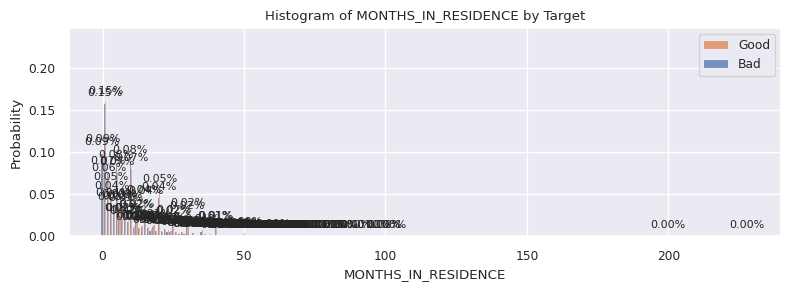

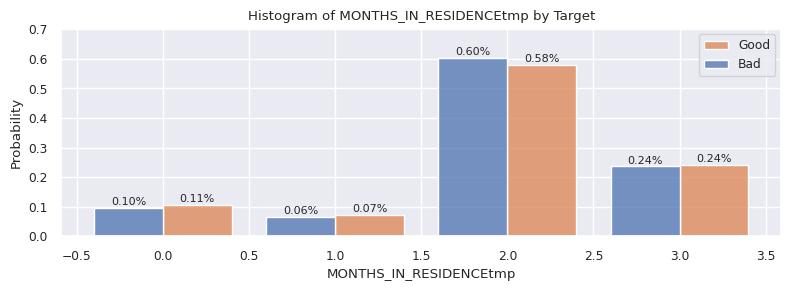

In [392]:
# Months_in_residence
# it must be numerical value for scalar dependency
curr_col_name = "MONTHS_IN_RESIDENCE"
tmp_col = curr_col_name + "tmp"
# before of cleaning
plotting_histogram_target_one(curr_col_name, app_train_cop, target_col)


# 0:+3year, 1:3years, 2:2years, 3:1year
app_train_cop[tmp_col] = np.where(
    app_train_cop[curr_col_name] <= 1,
    3,
    np.where(
        app_train_cop[curr_col_name] <= 24,
        2,
        np.where(app_train_cop[curr_col_name] <= 36, 1, 0),
    ),
)
app_test_cop[tmp_col] = np.where(
    app_test_cop[curr_col_name] <= 1,
    3,
    np.where(
        app_test_cop[curr_col_name] <= 24,
        2,
        np.where(app_test_cop[curr_col_name] <= 36, 1, 0),
    ),
)

plotting_histogram_target_one(tmp_col, app_train_cop, target_col)

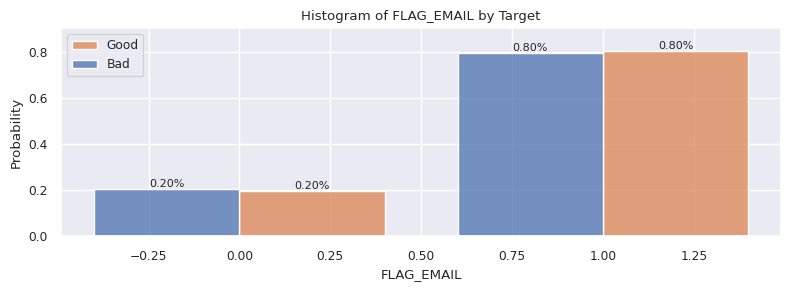

In [393]:
# 'FLAG_EMAIL' tiene valores de 0=9886, 1=40114, (REMOVED)
# se puede usar como indicador,? aunque la diferencia es de 4 a 1.
curr_col_name = "FLAG_EMAIL"
# before of cleaning
plotting_histogram_target_one(curr_col_name, app_train_cop, target_col)

##### Minimal Wage in Brazil
[Minimal Wage](https://www.remoti.io/blog/average-salary-in-brazil#:~:text=Minimum%20Wage,around%201.67%20USD%20per%20hour.). 
|Type of salary in Br|BRL/R$|
|--------------------|-----|
|minimum montlhy wage| 1320|
|average monthly cost of living| 3323|
|average monthly salary| 8560|
|highest-paid salary| 38200|

range of income achieve more than highest paid, it could be more than 40'000

In [394]:
# OTHER_INCOMES it could be add to personal income
# in order to increase people who has less than minimal salary
curr_col_name = "MONTHLY_INCOMES_TOT"
tmp_col = curr_col_name + "tmp"
app_train_cop[curr_col_name] = (
    app_train_cop["PERSONAL_MONTHLY_INCOME"] + app_train_cop["OTHER_INCOMES"]
)
app_test_cop[curr_col_name] = (
    app_test_cop["PERSONAL_MONTHLY_INCOME"] + app_test_cop["OTHER_INCOMES"]
)

In [395]:
# 'PERSONAL_MONTHLY_INCOME' no tiene valores nulos,
# se puede usar como indicador, pero hay que ajustar entre rangos,
# para mejorar la calidad de la columna.
# Separate by ranges but keeping numerical behaviour
# weight more to minimal ranges and less weight to great ranges
# focuse people who has minimal salary

# according to this
curr_col_name = "MONTHLY_INCOMES_TOT"
tmp_col = curr_col_name + "tmp"
# before of cleaning
# plotting_histogram_target_one(curr_col_name, app_train_cop, target_col)

# |minimum montlhy wage| [0-650]->5
# |minimum montlhy wage| [650-1320]->4
# |average monthly cost of living| [1320-3323]->3
# |average monthly salary| 8560| [3323-8560]->2
# |highest-paid salary| 38200| [>8560]->1

# it should be a numerical value

# Reglas:
app_train_cop[tmp_col] = np.where(
    app_train_cop[curr_col_name] < 650,
    "[0-650]",
    np.where(
        app_train_cop[curr_col_name] < 1320,
        "[650-1320]",
        np.where(
            app_train_cop[curr_col_name] < 3323,
            "[1320-3323]",
            np.where(app_train_cop[curr_col_name] < 8560, "[3323-8560]", "[>8560]"),
        ),
    ),
)

app_test_cop[tmp_col] = np.where(
    app_test_cop[curr_col_name] < 650,
    "[0-650]",
    np.where(
        app_test_cop[curr_col_name] < 1320,
        "[650-1320]",
        np.where(
            app_test_cop[curr_col_name] < 3323,
            "[1320-3323]",
            np.where(app_test_cop[curr_col_name] < 8560, "[3323-8560]", "[>8560]"),
        ),
    ),
)


# percents_by_target = get_percents_by_target(tmp_col, app_train_cop, target_col)
# fig, axes = plt.subplots(1, 2, figsize=(8, 2))
# plot_value_counts(
#     fig, axes, tmp_col, app_train_cop, app_test_cop, percents_by_target, target_col
# )

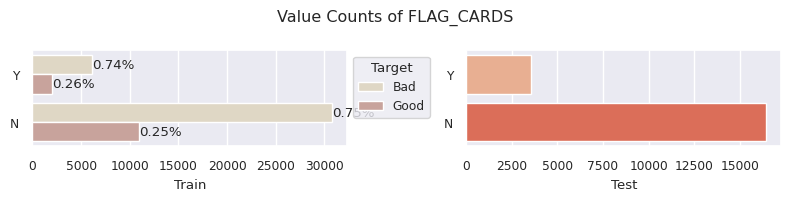

In [396]:
# 'FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS',
# 'FLAG_AMERICAN_EXPRESS', 'FLAG_OTHER_CARDS'
# se podria colocar como si tiene o no tarjeta de credito, o cantidad de tarjetas de credito sin importar la marca.
# it was a good idea from Yessid to join flag cards
# and keep as a categorical variable
curr_col_name = "FLAG_CARDS"
tmp_col = curr_col_name

list_cards = [
    "FLAG_VISA",
    "FLAG_MASTERCARD",
    "FLAG_DINERS",
    "FLAG_AMERICAN_EXPRESS",
    "FLAG_OTHER_CARDS",
]


app_train_cop[tmp_col] = np.where(
    app_train_cop[list_cards[0]] > 0,
    "Y",
    np.where(
        app_train_cop[list_cards[1]] > 0,
        "Y",
        np.where(
            app_train_cop[list_cards[2]] > 0,
            "Y",
            np.where(
                app_train_cop[list_cards[3]] > 0,
                "Y",
                np.where(app_train_cop[list_cards[4]] > 0, "Y", "N"),
            ),
        ),
    ),
)

app_test_cop[tmp_col] = np.where(
    app_test_cop[list_cards[0]] > 0,
    "Y",
    np.where(
        app_test_cop[list_cards[1]] > 0,
        "Y",
        np.where(
            app_test_cop[list_cards[2]] > 0,
            "Y",
            np.where(
                app_test_cop[list_cards[3]] > 0,
                "Y",
                np.where(app_test_cop[list_cards[4]] > 0, "Y", "N"),
            ),
        ),
    ),
)

# after of cleaning
percents_by_target = get_percents_by_target(tmp_col, app_train_cop, target_col)
fig, axes = plt.subplots(1, 2, figsize=(8, 2))
plot_value_counts(
    fig, axes, tmp_col, app_train_cop, app_test_cop, percents_by_target, target_col
)

In [397]:
# 'QUANT_BANKING_ACCOUNTS'
# tiene 3 valores (2=14, 1=17864, 0=32122),
# se podria categorizar en si tiene o no tiene cuenta
# It should be a numerical value, quantity of cards
# could be influenced on target variable
curr_col_name = "QUANT_BANKING_ACCOUNTS"
tmp_col = "QUANT_BANKING_ACCOUNTS_TOT"

app_train_cop[tmp_col] = (
    app_train_cop["QUANT_BANKING_ACCOUNTS"]
    + app_train_cop["QUANT_SPECIAL_BANKING_ACCOUNTS"]
)
app_test_cop[tmp_col] = (
    app_test_cop["QUANT_BANKING_ACCOUNTS"]
    + app_test_cop["QUANT_SPECIAL_BANKING_ACCOUNTS"]
)

In [398]:
# look at relationship between target and months_in_residence
print("Relationship between Target and QUANT_BANKING_ACCOUNTS")
# people who has many banking cards is likely that they will pay the loan
# people who has few banking cards is likely that they won't pay the loan
app_train_cop[["TARGET_LABEL_BAD=1", "QUANT_BANKING_ACCOUNTS"]].groupby(
    ["QUANT_BANKING_ACCOUNTS"]
).count()

Relationship between Target and QUANT_BANKING_ACCOUNTS


,TARGET_LABEL_BAD=1
QUANT_BANKING_ACCOUNTS,
0,32122
1,17864
2,14


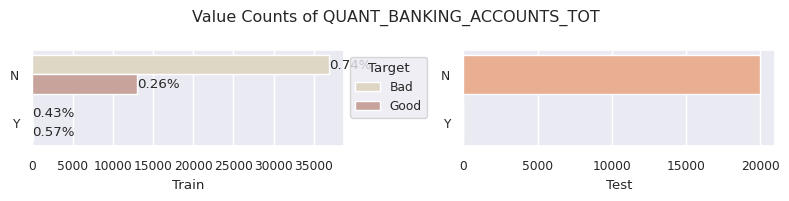

In [399]:
curr_col_name = "QUANT_BANKING_ACCOUNTS"
tmp_col = "QUANT_BANKING_ACCOUNTS_TOT"
# before of cleaning
#plotting_distribution(curr_col_name, app_train_cop, app_test_cop, target_col)

# categorical changes
app_train_cop[tmp_col] = np.where(app_train_cop[curr_col_name] >= 2, "Y", "N")
app_test_cop[tmp_col] = np.where(app_test_cop[curr_col_name] >= 2, "Y", "N")

# after of cleaning
percents_by_target = get_percents_by_target(tmp_col, app_train_cop, target_col)
fig, axes = plt.subplots(1, 2, figsize=(8, 2))
plot_value_counts(
    fig, axes, tmp_col, app_train_cop, app_test_cop, percents_by_target, target_col
)

In [400]:
# PERSONAL ASSETS VALUE
# it achieves range from [0 to 6'000'000] of R$
# it could be a numerical value but with coded weight
curr_col_name = "PERSONAL_ASSETS_VALUE"
app_train_cop[["TARGET_LABEL_BAD=1", curr_col_name]].groupby([curr_col_name]).count()[
    ::10
]
# people who don't have any personal values likely pay their loans

,TARGET_LABEL_BAD=1
PERSONAL_ASSETS_VALUE,
0.0,47609
27.0,1
60.0,1
260.0,2
4000.0,6
8300.0,2
12000.0,44
18000.0,34
25000.0,198


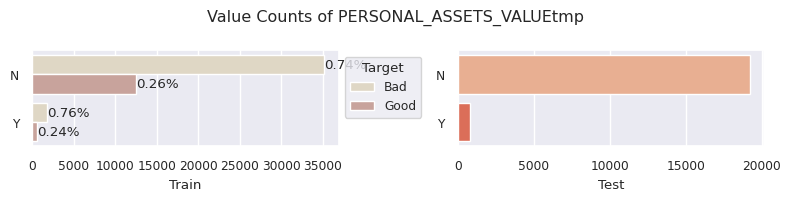

In [401]:
curr_col_name = "PERSONAL_ASSETS_VALUE"
tmp_col = curr_col_name + "tmp"
# before of cleaning
#plotting_distribution(curr_col_name, app_train_cop, app_test_cop, target_col)
# it has counting more in people who don't have any personal value
# so it could be cast in categorical as Y, N category
app_train_cop[tmp_col] = np.where(app_train_cop[curr_col_name] > 0, "Y", "N")
app_test_cop[tmp_col] = np.where(app_test_cop[curr_col_name] > 0, "Y", "N")
percents_by_target = get_percents_by_target(tmp_col, app_train_cop, target_col)
fig, axes = plt.subplots(1, 2, figsize=(8, 2))
plot_value_counts(
    fig, axes, tmp_col, app_train_cop, app_test_cop, percents_by_target, target_col
)

In [402]:
# QUANT_CARS' se podria cambiar si tiene carro o no,
# ya que los valores son 0 y 1.
# it should be a categorical value of Y,N
curr_col_name = "QUANT_CARS"
tmp_col = curr_col_name + "tmp"
app_train_cop[["TARGET_LABEL_BAD=1", curr_col_name]].groupby([curr_col_name]).count()
# an important personal active
# people who don't have a car likely won't pay the loan

,TARGET_LABEL_BAD=1
QUANT_CARS,
0,33193
1,16807


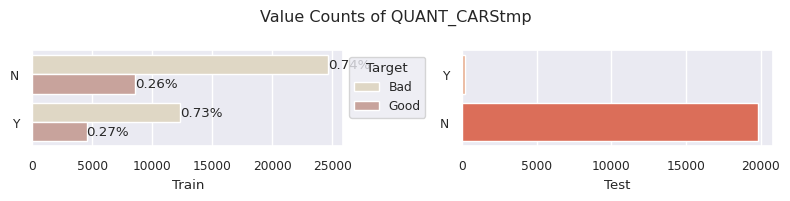

In [403]:
# QUANT CARS
curr_col_name = "QUANT_CARS"
tmp_col = curr_col_name + "tmp"
# before of cleaning
#plotting_distribution(curr_col_name, app_train_cop, app_test_cop, target_col)

app_train_cop[tmp_col] = np.where(app_train_cop[curr_col_name] == 1, "Y", "N")
app_test_cop[tmp_col] = np.where(app_test_cop[curr_col_name] == 1, "Y", "N")

percents_by_target = get_percents_by_target(tmp_col, app_train_cop, target_col)
fig, axes = plt.subplots(1, 2, figsize=(8, 2))
plot_value_counts(
    fig, axes, tmp_col, app_train_cop, app_test_cop, percents_by_target, target_col
)

In [404]:
# 'MONTHS_IN_THE_JOB' la mayoria de informacion se concentra
# range in [0-40] months 3.3years
# it should be a numerical  but
# it has more counts in 0 (people who probably don't have a job)
# so cast to categorical: Y (have a job),N(don't have a job)
curr_col_name = "MONTHS_IN_THE_JOB"
# print(app_train_cop[curr_col_name].value_counts().sort_values(ascending=False)[::2])
app_train_cop[["TARGET_LABEL_BAD=1", curr_col_name]].groupby([curr_col_name]).count()[
    ::2
]

,TARGET_LABEL_BAD=1
MONTHS_IN_THE_JOB,
0,49924
2,18
4,4
6,2
8,2
10,1
14,2
18,2
26,1


In [405]:
# months in job (REMOVED)
curr_col_name = "MONTHS_IN_THE_JOB"
#plotting_distribution(curr_col_name, app_train_cop, app_test_cop, target_col)

##### 'PROFESSION_CODE'
- searching codes only have a Brazil’s CBO94 codes but it has 
codes in group subgroups and general subgroups
- ranges of data is from [1-18],[1-27]

- If it has international code use [ISCO-08](https://www.ilo.org/public/english/bureau/stat/isco/docs/publication08.pdf), [ISCO-08 page](https://www.ilo.org/public/english/bureau/stat/isco/isco08/)

- If it has Brazil code use [CB094](http://www.mtecbo.gov.br/cbosite/pages/downloads.jsf), [CB094 page](http://www.mtecbo.gov.br/cbosite/pages/home.jsf)

- It is a good idea to delete this columne
- 1 reason it has many categories
- 2 reason it doesn't know the correct code of profession
- the high count is from code 9 but it could whatever profession in before standards, so it would be remove
- even if it has a good feature importance (TODO)

In [406]:
# 'PROFESSION_CODE' tiene mas de 7000 valores nulos, (REMOVED)
# hay valores del 0 hasta el 18,
# pienso que podemos eliminar la columna en vez de las celdas.
curr_col_name = "PROFESSION_CODE"
app_train_cop[curr_col_name].fillna(-1, inplace=True)
#plotting_distribution(curr_col_name, app_train_cop, app_test_cop, target_col)
# remove_tmp_column(curr_col_name,app_train_cop,app_test_cop)

##### OCCUPATION TYPE
- in this case range is only 5 distinct values
- we could use the bih group of codes but again
- it is a guess, we don't know exactly the mapping of codes to occupation type.
- it is considered we could add bias if the user select
- a wrong code
- for this reason this column will be remove anyway it will checks the feature importance if we consider this column

In [407]:
#'OCCUPATION_TYPE' tiene valores del 0 hasta el 5, (REMOVED)
# y 7313 valores nulo, podriamos cambiar el nulo
# por desempleado (asumo que es valor de 0)
curr_col_name = "OCCUPATION_TYPE"
app_train_cop[curr_col_name].fillna(-1, inplace=True)
app_test_cop[curr_col_name].fillna(-1, inplace=True)
#plotting_distribution(curr_col_name, app_train_cop, app_test_cop, target_col)
# remove_tmp_column(curr_col_name,app_train_cop,app_test_cop)

In [408]:
#'MATE_PROFESSION_CODE' tiene mas de 28 mil datos vacios, se puede eliminar.(REMOVED)
curr_col_name = "MATE_PROFESSION_CODE"
app_train_cop[curr_col_name].fillna(-1, inplace=True)
app_test_cop[curr_col_name].fillna(-1, inplace=True)
#plotting_distribution(curr_col_name, app_train_cop, app_test_cop, target_col)
# remove_tmp_column(curr_col_name,app_train_cop,app_test_cop)

In [409]:
# MATE_EDUCATION_LEVEL (REMOVED)
# it could remove because consideably it has many missing
# values and we don't know exactly the codes of professions
# it will be analyzed with feature importance but
# it is considerably dangerous to guess the code in this
# category variable
curr_col_name = "MATE_EDUCATION_LEVEL"
app_train_cop[curr_col_name].fillna(-1, inplace=True)
app_test_cop[curr_col_name].fillna(-1, inplace=True)
#plotting_distribution(curr_col_name, app_train_cop, app_test_cop, target_col)
# remove_tmp_column(curr_col_name,app_train_cop,app_test_cop)

In [410]:
# 'FLAG_HOME_ADDRESS_DOCUMENT' (REMOVED)
# solo tiene un valor de 0 para todas las filas,
# se puede eliminar.

# thinking on domain problem it will be replaced
# by RESIDENCE_TYPE and MONTHS_IN_RESIDENCE

# if we choose a flag with 2 values or vector of flags
# in RESIDENCE_TYPE or vector of number in MONTHS_IN_RESIDENCE
# it is better a vector

curr_col_name = "FLAG_HOME_ADDRESS_DOCUMENT"
#plotting_distribution(curr_col_name, app_train_cop, app_test_cop, target_col)
# remove_tmp_column(curr_col_name,app_train_cop,app_test_cop)

In [411]:
# FLAG_RG (REMOVED)
# Flag indicating documental confirmation of citizen card number
# same as "FLAG_HOME_ADDRESS_DOCUMENT"
curr_col_name = "FLAG_RG"
#plotting_distribution(curr_col_name, app_train_cop, app_test_cop, target_col)
# remove_tmp_column(curr_col_name,app_train_cop,app_test_cop)

In [412]:
# FLAG_CPF  (REMOVED)
# Flag indicating documental confirmation of tax payer status
# same as "FLAG_HOME_ADDRESS_DOCUMENT"
curr_col_name = "FLAG_CPF"
#plotting_distribution(curr_col_name, app_train_cop, app_test_cop, target_col)
# remove_tmp_column(curr_col_name,app_train_cop,app_test_cop)

In [413]:
# FLAG_INCOME_PROOF  (REMOVED)
# Flag indicating documental confirmation of income
# same as "FLAG_HOME_ADDRESS_DOCUMENT"
curr_col_name = "FLAG_INCOME_PROOF"
#plotting_distribution(curr_col_name, app_train_cop, app_test_cop, target_col)
# remove_tmp_column(curr_col_name,app_train_cop,app_test_cop)

In [414]:
# PRODUCT  (REMOVED)
# Type of credit product applied. Encoding not informed
# again it doesn't have exactly mapping codes
# it must be removed
curr_col_name = "PRODUCT"
#plotting_distribution(curr_col_name, app_train_cop, app_test_cop, target_col)
# remove_tmp_column(curr_col_name,app_train_cop,app_test_cop)

lims: [-2.0,86.0]
lims: [-3.0,77.0]


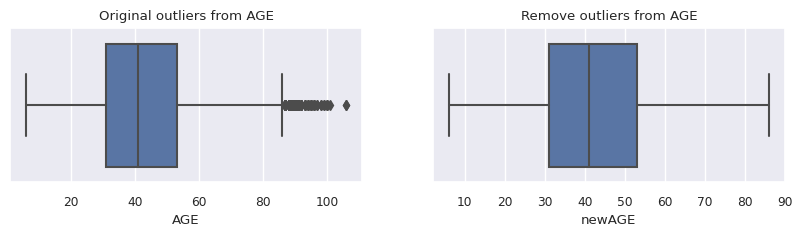

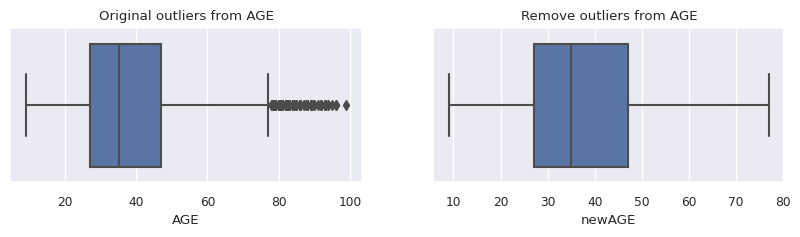

In [415]:
# AGE (after of fi removed)
# Applicant's age at the moment of submission
# it should be a numerical value
curr_col_name = "AGE"
tmp_col = curr_col_name + "tmp"
proc_outliers(app_train_cop, curr_col_name)
proc_outliers(app_test_cop, curr_col_name)
#plotting_distribution(curr_col_name, app_train_cop, app_test_cop, target_col)

In [416]:
# there exist people who have less than 18 years old
# but they can get a loan and people who has more than
# 70 years old and they can get a loan too

app_train_cop[["TARGET_LABEL_BAD=1", curr_col_name]].groupby([curr_col_name]).count()[-8:]

,TARGET_LABEL_BAD=1
AGE,
79,107
80,85
81,73
82,67
83,53
84,51
85,42
86,153


#### Working with categorical columns

In [417]:
category_field_names = app_train.select_dtypes(exclude="number").columns.to_list()

In [418]:
for categorical_field in category_field_names:
    print(
        "{:<32}{:<8}{}".format(
            categorical_field,
            len(app_train[categorical_field].unique()),
            metadata.iloc[metadata_dic[categorical_field], 2],
        )
    )

CLERK_TYPE                      1       C
APPLICATION_SUBMISSION_TYPE     3       Web, Carga
SEX                             4       M=Male, F=Female
STATE_OF_BIRTH                  29      Brazilian states, XX, missing
CITY_OF_BIRTH                   9910    nan
RESIDENCIAL_STATE               27      nan
RESIDENCIAL_CITY                3529    nan
RESIDENCIAL_BOROUGH             14511   nan
FLAG_RESIDENCIAL_PHONE          2       Y,N
RESIDENCIAL_PHONE_AREA_CODE     102     nan
FLAG_MOBILE_PHONE               1       Y,N
COMPANY                         2       Y,N
PROFESSIONAL_STATE              28      nan
PROFESSIONAL_CITY               2237    nan
PROFESSIONAL_BOROUGH            5058    nan
FLAG_PROFESSIONAL_PHONE         2       Y,N
PROFESSIONAL_PHONE_AREA_CODE    87      nan
FLAG_ACSP_RECORD                1       Y, N
RESIDENCIAL_ZIP_3               1481    nan
PROFESSIONAL_ZIP_3              1481    nan


In [419]:
for categorical_field in category_field_names:
    print(
        "{:<32}{:<8}{}".format(
            categorical_field,
            len(app_train[categorical_field].unique()),
            metadata.iloc[metadata_dic[categorical_field], 1],
        )
    )

CLERK_TYPE                      1       Not informed
APPLICATION_SUBMISSION_TYPE     3       Indicates if the application was submitted via the internet or in person/posted
SEX                             4       nan
STATE_OF_BIRTH                  29      nan
CITY_OF_BIRTH                   9910    nan
RESIDENCIAL_STATE               27      State of residence
RESIDENCIAL_CITY                3529    City of residence
RESIDENCIAL_BOROUGH             14511   Borough of residence
FLAG_RESIDENCIAL_PHONE          2       Indicates if the applicant possesses a home phone
RESIDENCIAL_PHONE_AREA_CODE     102     Three-digit pseudo-code
FLAG_MOBILE_PHONE               1       Indicates if the applicant possesses a mobile phone
COMPANY                         2       If the applicant has supplied the name of the company where he/she formally works
PROFESSIONAL_STATE              28      State where the applicant works
PROFESSIONAL_CITY               2237    City where the applicant works
PROFES

In [420]:
curr_col_name = "APPLICATION_SUBMISSION_TYPE"
app_train_cop[["TARGET_LABEL_BAD=1", curr_col_name]].groupby([curr_col_name]).count()

,TARGET_LABEL_BAD=1
APPLICATION_SUBMISSION_TYPE,
0,19461
Carga,2333
Web,28206


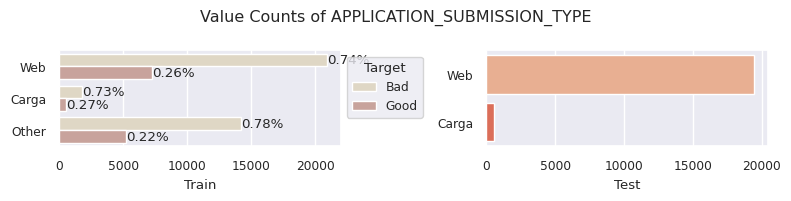

In [421]:
# APPLICATION_SUBMISSION_TYPE
# 'APPLICATION_SUBMISSION_TYPE' tiene ('0' 'Carga' 'Web')
# 0 será dispuesto como Otro y tratado categorico
curr_col_name = "APPLICATION_SUBMISSION_TYPE"
app_train_cop.loc[app_train_cop[curr_col_name] == "0", curr_col_name] = "Other"
app_test_cop.loc[app_test_cop[curr_col_name] == "0", curr_col_name] = "Other"
percents_by_target = get_percents_by_target(curr_col_name, app_train_cop, target_col)
fig, axes = plt.subplots(1, 2, figsize=(8, 2))
plot_value_counts(
    fig,
    axes,
    curr_col_name,
    app_train_cop,
    app_test_cop,
    percents_by_target,
    target_col,
)

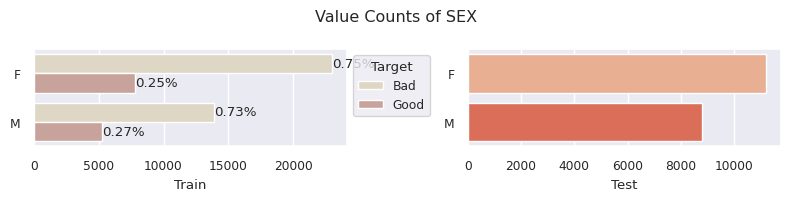

In [422]:
# 'SEX'
# se conserva y es asignada como categorica
# los valores N y " " serán asignadas como nueva categoria
# pero la cantidad de valores asociados es muy pequeño
# además en las prediciones no se cuenta con una categoria adicional
# por lo pronto se removerán dichas filas

curr_col_name = "SEX"
# only in train
app_train_cop.drop(
    app_train_cop[
        (app_train_cop[curr_col_name] == "N") | (app_train_cop[curr_col_name] == " ")
    ].index,
    inplace=True,
)
percents_by_target = get_percents_by_target(curr_col_name, app_train_cop, target_col)
fig, axes = plt.subplots(1, 2, figsize=(8, 2))
plot_value_counts(
    fig,
    axes,
    curr_col_name,
    app_train_cop,
    app_test_cop,
    percents_by_target,
    target_col,
)

##### working on residencial state

In [423]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [424]:
wikiurl = "https://en.wikipedia.org/wiki/Federative_units_of_Brazil"
table_class = "wikitable sortable jquery-tablesorter"
response = requests.get(wikiurl)
print(response.status_code)

200


In [425]:
# get table brazil states with size population
soup = BeautifulSoup(response.text, "html.parser")
brasiltable = soup.find("table",{"class":"wikitable"})

In [426]:
brasiltable_df = pd.read_html(str(brasiltable))
brasiltable_df = pd.DataFrame(brasiltable_df[0])
brasiltable_df.head()

,Flag and name,Code,Capital,Largest city,Area (km2)[20],Population (May 2023)[21],"Density (per km2, 2022)","GDP (R$ millions, 2022)[22]",HDI (2022)[23]
0,Acre,AC,Rio Branco,Rio Branco,164123,942123,6.34,21000,0.719
1,Alagoas,AL,Maceió,Maceió,27779,3407562,125.52,73000,0.683
2,Amapá,AP,Macapá,Macapá,142829,904535,2.63,9000,0.740
3,Amazonas,AM,Manaus,Manaus,1559159,4235555,2.58,103000,0.733
4,Bahia,BA,Salvador,Salvador,564733,15128926,30.52,257000,0.714


In [427]:
brasil_states_pop = brasiltable_df.loc[:,["Code","Population (May 2023)[21]"]]
brasil_states_pop = brasil_states_pop.rename(
    columns = {"Code":"State","Population (May 2023)[21]":"Population"}
)
brasilstatespop_gen = brasil_states_pop.copy()

In [428]:
brasilstatespop_gen.loc[brasilstatespop_gen["Population"] >= 10000000,"GroupPop"]="Pop_A"
brasilstatespop_gen.loc[(brasilstatespop_gen["Population"] >= 1000000) & (brasilstatespop_gen["Population"] < 10000000),"GroupPop"]="Pop_B"
brasilstatespop_gen.loc[(brasilstatespop_gen["Population"] >= 100000) & (brasilstatespop_gen["Population"] < 1000000),"GroupPop"]="Pop_C"
brasilstatespop_gen.loc[brasilstatespop_gen["State"]=="AC","GroupPop"][0]


'Pop_C'

In [429]:
curr_col_name = "RESIDENCIAL_STATE"

In [430]:
state_contperc = app_train_cop[curr_col_name].value_counts().values / len(app_train_cop)
state_names = np.array(app_train_cop[curr_col_name].value_counts().index)
states_others = [
    name for contperc, name in zip(state_contperc, state_names) if contperc < 0.002
]
states_others

['RR']

In [431]:
list(brasilstatespop_gen.loc[brasilstatespop_gen["State"]=="RN","GroupPop"])[0]

'Pop_B'

In [432]:
#app_train_cop[curr_col_name] = app_train_cop[curr_col_name].apply(lambda x:list(brasilstatespop_gen.loc[brasilstatespop_gen["State"]==x,"GroupPop"])[0])

In [433]:
#app_test_cop[curr_col_name] = app_test_cop[curr_col_name].apply(lambda x:list(brasilstatespop_gen.loc[brasilstatespop_gen["State"]==x,"GroupPop"])[0])

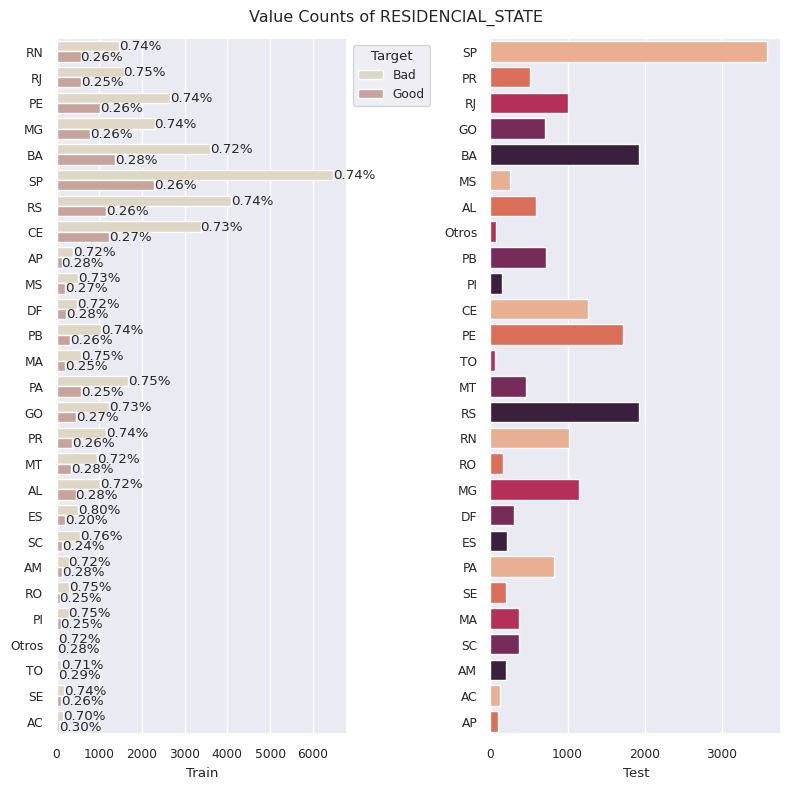

In [434]:
# RESIDENCIAL_STATE
# it could be add some importance to the model
# because it is the current place where people live
# territory has a different economy so it has a good weight on model
curr_col_name = "RESIDENCIAL_STATE"
app_train_cop.loc[
    app_train_cop[curr_col_name].isin(states_others), curr_col_name
] = "Otros"
app_test_cop.loc[
    app_test_cop[curr_col_name].isin(states_others), curr_col_name
] = "Otros"
percents_by_target = get_percents_by_target(curr_col_name, app_train_cop, target_col)
fig, axes = plt.subplots(1, 2, figsize=(8, 8))
plot_value_counts(fig,axes,curr_col_name,app_train_cop,app_test_cop,percents_by_target,target_col)

In [435]:
# RESIDENCIAL_STATE
# it could be add some importance to the model
# because it is the current place where people live
# territory has a different economy so it has a good weight on model
# curr_col_name = "RESIDENCIAL_STATE"
# percents_by_target = get_percents_by_target(curr_col_name, app_train_cop, target_col)
# fig, axes = plt.subplots(1, 2, figsize=(8, 3))
# plot_value_counts(fig,axes,curr_col_name,app_train_cop,app_test_cop,percents_by_target,target_col)

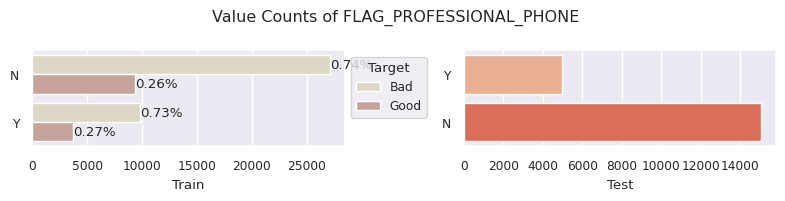

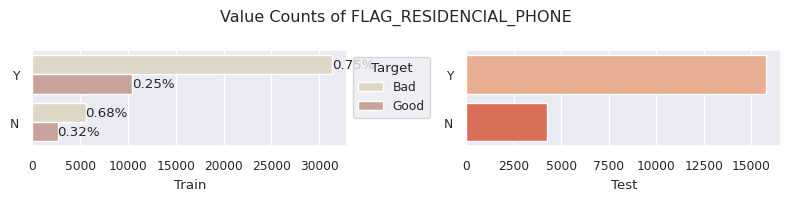

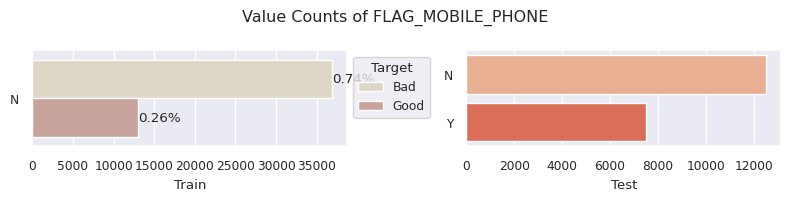

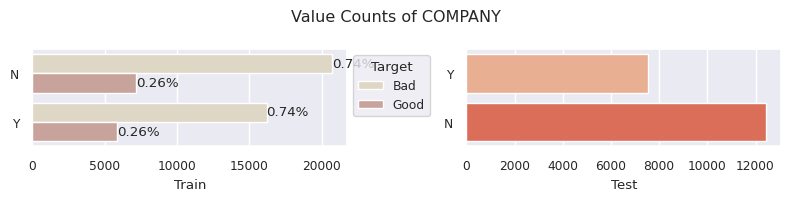

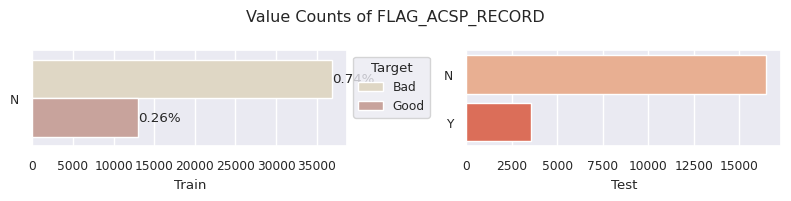

In [436]:
# 'FLAG_PROFESSIONAL_PHONE'
# it could be a good disparity to set if a person has a job
# 'FLAG_RESIDENCIAL_PHONE'
# it could be a good disparity to set if a person has a house
curr_col_name = "FLAG_PROFESSIONAL_PHONE"
percents_by_target = get_percents_by_target(curr_col_name, app_train_cop, target_col)
fig, axes = plt.subplots(1, 2, figsize=(8, 2))
plot_value_counts(
    fig,
    axes,
    curr_col_name,
    app_train_cop,
    app_test_cop,
    percents_by_target,
    target_col,
)

curr_col_name = "FLAG_RESIDENCIAL_PHONE"
percents_by_target = get_percents_by_target(curr_col_name, app_train_cop, target_col)
fig, axes = plt.subplots(1, 2, figsize=(8, 2))
plot_value_counts(
    fig,
    axes,
    curr_col_name,
    app_train_cop,
    app_test_cop,
    percents_by_target,
    target_col,
)

curr_col_name = "FLAG_MOBILE_PHONE"
percents_by_target = get_percents_by_target(curr_col_name, app_train_cop, target_col)
fig, axes = plt.subplots(1, 2, figsize=(8, 2))
plot_value_counts(
    fig,
    axes,
    curr_col_name,
    app_train_cop,
    app_test_cop,
    percents_by_target,
    target_col,
)

curr_col_name = "COMPANY"
percents_by_target = get_percents_by_target(curr_col_name, app_train_cop, target_col)
fig, axes = plt.subplots(1, 2, figsize=(8, 2))
plot_value_counts(
    fig,
    axes,
    curr_col_name,
    app_train_cop,
    app_test_cop,
    percents_by_target,
    target_col,
)

# FLAG_ACSP_RECORD
# Flag indicating if the applicant
# has any previous credit delinquency
curr_col_name = "FLAG_ACSP_RECORD"
percents_by_target = get_percents_by_target(curr_col_name, app_train_cop, target_col)
fig, axes = plt.subplots(1, 2, figsize=(8, 2))
plot_value_counts(
    fig,
    axes,
    curr_col_name,
    app_train_cop,
    app_test_cop,
    percents_by_target,
    target_col,
)

In [437]:
# STATE_OF_BIRTH
# 'STATE_OF_BIRTH' tiene 29 valores diferentes incluyendo 
# un espacio vacio y XX,
# se eliminará dicha variable al no poseer mucha carga
# o aporte al modelo, ya que no hay mucha valor
# de importancia sobre la variable TARGET
domain_outside_columns = [
    "EDUCATION_LEVEL", # coding is not available
    "POSTAL_ADDRESS_TYPE", # few values in one category (disparity)
    "FLAG_EMAIL",
    "PERSONAL_MONTHLY_INCOME",
    "OTHER_INCOMES",
    "QUANT_BANKING_ACCOUNTS",
    "QUANT_SPECIAL_BANKING_ACCOUNTS",
    "FLAG_VISA",
    "FLAG_MASTERCARD",
    "FLAG_DINERS",
    "FLAG_AMERICAN_EXPRESS",
    "FLAG_OTHER_CARDS",
    "MONTHS_IN_THE_JOB",
    "PROFESSION_CODE",
    "OCCUPATION_TYPE",
    "MATE_PROFESSION_CODE",
    "MATE_EDUCATION_LEVEL",
    "FLAG_HOME_ADDRESS_DOCUMENT",
    "FLAG_RG",
    "FLAG_CPF",
    "FLAG_INCOME_PROOF",
    "PRODUCT",
    "AGE",
    "CLERK_TYPE",
    "STATE_OF_BIRTH",
    "CITY_OF_BIRTH",
    "RESIDENCIAL_CITY",
    "RESIDENCIAL_BOROUGH",
    "RESIDENCIAL_PHONE_AREA_CODE",
    "PROFESSIONAL_STATE",
    "PROFESSIONAL_CITY",
    "PROFESSIONAL_BOROUGH",
    "PROFESSIONAL_PHONE_AREA_CODE",
    "RESIDENCIAL_ZIP_3",
    "PROFESSIONAL_ZIP_3",
    "FLAG_ACSP_RECORD", # it has one only category in train
    "FLAG_MOBILE_PHONE", # it has one only category in train
    "QUANT_ADDITIONAL_CARDS", # it has one only category in train
    "QUANT_ADDITIONAL_CARDStmp", # it has one only category in train
    #aditional_columns
    "PAYMENT_DAY",
    "MARITAL_STATUS",
    "QUANT_DEPENDANTS",
    "RESIDENCE_TYPE",
    "MONTHS_IN_RESIDENCE",
    "PERSONAL_ASSETS_VALUE",
    "QUANT_CARS",
    "MONTHLY_INCOMES_TOT",
    "NACIONALITY"
]

list_not_find = []
list_removed = []
for outside_column in domain_outside_columns:
    if(outside_column in app_train_cop.columns):
        list_removed.append(outside_column)
        remove_tmp_column(outside_column,app_train_cop,app_test_cop)
    else:
        list_not_find.append(outside_column)

print("this columns were removed: ",list_removed)
print("this columns were not found: ",list_not_find)

this columns were removed:  ['EDUCATION_LEVEL', 'POSTAL_ADDRESS_TYPE', 'FLAG_EMAIL', 'PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES', 'QUANT_BANKING_ACCOUNTS', 'QUANT_SPECIAL_BANKING_ACCOUNTS', 'FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS', 'FLAG_OTHER_CARDS', 'MONTHS_IN_THE_JOB', 'PROFESSION_CODE', 'OCCUPATION_TYPE', 'MATE_PROFESSION_CODE', 'MATE_EDUCATION_LEVEL', 'FLAG_HOME_ADDRESS_DOCUMENT', 'FLAG_RG', 'FLAG_CPF', 'FLAG_INCOME_PROOF', 'PRODUCT', 'AGE', 'CLERK_TYPE', 'STATE_OF_BIRTH', 'CITY_OF_BIRTH', 'RESIDENCIAL_CITY', 'RESIDENCIAL_BOROUGH', 'RESIDENCIAL_PHONE_AREA_CODE', 'PROFESSIONAL_STATE', 'PROFESSIONAL_CITY', 'PROFESSIONAL_BOROUGH', 'PROFESSIONAL_PHONE_AREA_CODE', 'RESIDENCIAL_ZIP_3', 'PROFESSIONAL_ZIP_3', 'FLAG_ACSP_RECORD', 'FLAG_MOBILE_PHONE', 'QUANT_ADDITIONAL_CARDS', 'QUANT_ADDITIONAL_CARDStmp', 'PAYMENT_DAY', 'MARITAL_STATUS', 'QUANT_DEPENDANTS', 'RESIDENCE_TYPE', 'MONTHS_IN_RESIDENCE', 'PERSONAL_ASSETS_VALUE', 'QUANT_CARS', 'MONTHLY_INCOMES_TOT', 'NA

In [438]:
app_train_cop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49935 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   APPLICATION_SUBMISSION_TYPE  49935 non-null  object  
 1   SEX                          49935 non-null  object  
 2   RESIDENCIAL_STATE            49935 non-null  object  
 3   FLAG_RESIDENCIAL_PHONE       49935 non-null  object  
 4   COMPANY                      49935 non-null  object  
 5   FLAG_PROFESSIONAL_PHONE      49935 non-null  object  
 6   TARGET_LABEL_BAD=1           49935 non-null  int64   
 7   PAYMENT_DAYtmp               49935 non-null  category
 8   MARITAL_STATUStmp            49935 non-null  object  
 9   QUANT_DEPENDANTStmp          49935 non-null  int64   
 10  NACIONALITYtmp               49935 non-null  object  
 11  RESIDENCE_TYPEtmp            49935 non-null  object  
 12  MONTHS_IN_RESIDENCEtmp       49935 non-null  int64   
 13  MONTHL

In [439]:
app_train_cop.head()

,APPLICATION_SUBMISSION_TYPE,SEX,RESIDENCIAL_STATE,FLAG_RESIDENCIAL_PHONE,COMPANY,FLAG_PROFESSIONAL_PHONE,TARGET_LABEL_BAD=1,PAYMENT_DAYtmp,MARITAL_STATUStmp,QUANT_DEPENDANTStmp,NACIONALITYtmp,RESIDENCE_TYPEtmp,MONTHS_IN_RESIDENCEtmp,MONTHLY_INCOMES_TOTtmp,FLAG_CARDS,QUANT_BANKING_ACCOUNTS_TOT,PERSONAL_ASSETS_VALUEtmp,QUANT_CARStmp
0,Web,F,RN,Y,N,N,1,1quinc,Other,1,Brazil,owned,2,[650-1320],Y,N,N,N
1,Carga,F,RJ,Y,Y,N,1,1quinc,married,0,Brazil,owned,3,[650-1320],N,N,N,N
2,Web,F,RN,Y,N,N,0,1quinc,married,0,Brazil,owned,0,[0-650],N,N,N,N
3,Web,F,PE,N,N,N,0,2quinc,married,0,Brazil,other,0,[0-650],N,N,N,N
4,Web,M,RJ,Y,N,N,1,1quinc,married,0,Brazil,owned,2,[650-1320],N,N,N,N


In [440]:
colnames = app_train_cop.columns.to_list()
colnames_fixed = [colname[:-3] if colname[-3:]=="tmp" else colname for colname in colnames ]
app_train_cop.columns = colnames_fixed

In [441]:
colnames = app_test_cop.columns.to_list()
colnames_fixed = [colname[:-3] if colname[-3:]=="tmp" else colname for colname in colnames ]
app_test_cop.columns = colnames_fixed

In [442]:
app_train_cop.head()

,APPLICATION_SUBMISSION_TYPE,SEX,RESIDENCIAL_STATE,FLAG_RESIDENCIAL_PHONE,COMPANY,FLAG_PROFESSIONAL_PHONE,TARGET_LABEL_BAD=1,PAYMENT_DAY,MARITAL_STATUS,QUANT_DEPENDANTS,NACIONALITY,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,MONTHLY_INCOMES_TOT,FLAG_CARDS,QUANT_BANKING_ACCOUNTS_TOT,PERSONAL_ASSETS_VALUE,QUANT_CARS
0,Web,F,RN,Y,N,N,1,1quinc,Other,1,Brazil,owned,2,[650-1320],Y,N,N,N
1,Carga,F,RJ,Y,Y,N,1,1quinc,married,0,Brazil,owned,3,[650-1320],N,N,N,N
2,Web,F,RN,Y,N,N,0,1quinc,married,0,Brazil,owned,0,[0-650],N,N,N,N
3,Web,F,PE,N,N,N,0,2quinc,married,0,Brazil,other,0,[0-650],N,N,N,N
4,Web,M,RJ,Y,N,N,1,1quinc,married,0,Brazil,owned,2,[650-1320],N,N,N,N


In [443]:
app_test_cop.head()

,APPLICATION_SUBMISSION_TYPE,SEX,RESIDENCIAL_STATE,FLAG_RESIDENCIAL_PHONE,COMPANY,FLAG_PROFESSIONAL_PHONE,PAYMENT_DAY,MARITAL_STATUS,QUANT_DEPENDANTS,NACIONALITY,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,MONTHLY_INCOMES_TOT,FLAG_CARDS,QUANT_BANKING_ACCOUNTS_TOT,PERSONAL_ASSETS_VALUE,QUANT_CARS
0,Web,F,SP,Y,Y,Y,1quinc,single,0,Brazil,owned,1,[650-1320],Y,N,N,Y
1,Web,F,SP,Y,N,N,1quinc,single,0,Brazil,owned,2,[0-650],N,N,N,N
2,Web,F,SP,Y,Y,Y,2quinc,married,0,Brazil,owned,2,[650-1320],N,N,N,N
3,Web,F,PR,Y,N,N,1quinc,single,0,Brazil,owned,2,[0-650],N,N,N,N
4,Web,F,RJ,Y,N,N,2quinc,single,0,Brazil,owned,2,[650-1320],N,N,N,N


In [444]:
domain_categories = [
    "PAYMENT_DAY",
    "MARITAL_STATUS",
    "RESIDENCE_TYPE",
    "MONTHLY_INCOMES_TOT",
    "FLAG_CARDS",
    "QUANT_BANKING_ACCOUNTS_TOT",
    "PERSONAL_ASSETS_VALUE",
    "QUANT_CARS",
    "APPLICATION_SUBMISSION_TYPE",
    "SEX",
    "RESIDENCIAL_STATE",
    "FLAG_PROFESSIONAL_PHONE",
    "FLAG_RESIDENCIAL_PHONE",
    "COMPANY",
    "NACIONALITY"
]
list_not_find = []
list_categorized = []
for column_to_cat in domain_categories:
    if(column_to_cat in app_train_cop.columns):
        print(column_to_cat)
        list_categorized.append(column_to_cat)
        cast_to_category(column_to_cat,app_train_cop,app_test_cop)
    else:
        list_not_find.append(column_to_cat)
print("this columns were categorized: ",list_categorized)
print("this columns were not found: ",list_not_find)

PAYMENT_DAY
datatype train of PAYMENT_DAY: category
datatype test of PAYMENT_DAY: category
MARITAL_STATUS
datatype train of MARITAL_STATUS: category
datatype test of MARITAL_STATUS: category
RESIDENCE_TYPE
datatype train of RESIDENCE_TYPE: category
datatype test of RESIDENCE_TYPE: category
MONTHLY_INCOMES_TOT
datatype train of MONTHLY_INCOMES_TOT: category
datatype test of MONTHLY_INCOMES_TOT: category
FLAG_CARDS
datatype train of FLAG_CARDS: category
datatype test of FLAG_CARDS: category
QUANT_BANKING_ACCOUNTS_TOT
datatype train of QUANT_BANKING_ACCOUNTS_TOT: category
datatype test of QUANT_BANKING_ACCOUNTS_TOT: category
PERSONAL_ASSETS_VALUE
datatype train of PERSONAL_ASSETS_VALUE: category
datatype test of PERSONAL_ASSETS_VALUE: category
QUANT_CARS
datatype train of QUANT_CARS: category
datatype test of QUANT_CARS: category
APPLICATION_SUBMISSION_TYPE
datatype train of APPLICATION_SUBMISSION_TYPE: category
datatype test of APPLICATION_SUBMISSION_TYPE: category
SEX
datatype train of 

In [445]:
app_train_cop.head()

,APPLICATION_SUBMISSION_TYPE,SEX,RESIDENCIAL_STATE,FLAG_RESIDENCIAL_PHONE,COMPANY,FLAG_PROFESSIONAL_PHONE,TARGET_LABEL_BAD=1,PAYMENT_DAY,MARITAL_STATUS,QUANT_DEPENDANTS,NACIONALITY,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,MONTHLY_INCOMES_TOT,FLAG_CARDS,QUANT_BANKING_ACCOUNTS_TOT,PERSONAL_ASSETS_VALUE,QUANT_CARS
0,Web,F,RN,Y,N,N,1,1quinc,Other,1,Brazil,owned,2,[650-1320],Y,N,N,N
1,Carga,F,RJ,Y,Y,N,1,1quinc,married,0,Brazil,owned,3,[650-1320],N,N,N,N
2,Web,F,RN,Y,N,N,0,1quinc,married,0,Brazil,owned,0,[0-650],N,N,N,N
3,Web,F,PE,N,N,N,0,2quinc,married,0,Brazil,other,0,[0-650],N,N,N,N
4,Web,M,RJ,Y,N,N,1,1quinc,married,0,Brazil,owned,2,[650-1320],N,N,N,N


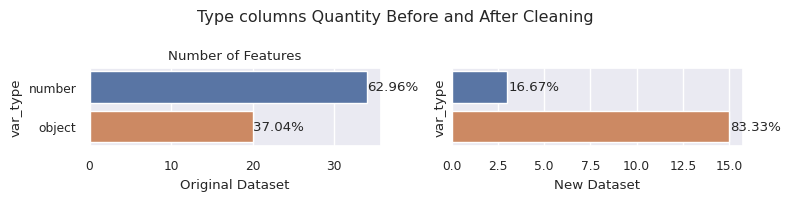

In [446]:
# show number of columns per data type
number_fields = len(app_train_cop.select_dtypes(include="number").columns)
object_fields = len(app_train_cop.select_dtypes(exclude="number").columns)
number_fields_o = len(app_train.select_dtypes(include="number").columns)
object_fields_o = len(app_train.select_dtypes(exclude="number").columns)

d = {
    "var_type": ["number", "object"],
    "quantity_cop": [number_fields, object_fields],
    "quantity_ori": [number_fields_o, object_fields_o],
}

quant_kind_vars = pd.DataFrame(data=d, index=[1, 2])

fig, axes = plt.subplots(1, 2, figsize=(8, 2), sharey=True)
fig.suptitle("Type columns Quantity Before and After Cleaning")
fig.align_labels()
sns.barplot(
    ax=axes[0], y=quant_kind_vars["var_type"], x=quant_kind_vars["quantity_ori"]
)
sns.barplot(
    ax=axes[1], y=quant_kind_vars["var_type"], x=quant_kind_vars["quantity_cop"]
)

axes[0].set_title("Number of Features")
axes[0].set_xlabel("Original Dataset")
axes[1].set_xlabel("New Dataset")

target_dist = plot.compute_stats_count(quant_kind_vars, "quantity_cop")
percents_cop = [i[2] for i in target_dist]
plot.percented_patches_second(axes[1], percents_cop)

target_dist = plot.compute_stats_count(quant_kind_vars, "quantity_ori")
percents_ori = [i[2] for i in target_dist]
plot.percented_patches_second(axes[0], percents_ori)

plt.tight_layout()

plt.show()

In [447]:
app_train_cop.head()

,APPLICATION_SUBMISSION_TYPE,SEX,RESIDENCIAL_STATE,FLAG_RESIDENCIAL_PHONE,COMPANY,FLAG_PROFESSIONAL_PHONE,TARGET_LABEL_BAD=1,PAYMENT_DAY,MARITAL_STATUS,QUANT_DEPENDANTS,NACIONALITY,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,MONTHLY_INCOMES_TOT,FLAG_CARDS,QUANT_BANKING_ACCOUNTS_TOT,PERSONAL_ASSETS_VALUE,QUANT_CARS
0,Web,F,RN,Y,N,N,1,1quinc,Other,1,Brazil,owned,2,[650-1320],Y,N,N,N
1,Carga,F,RJ,Y,Y,N,1,1quinc,married,0,Brazil,owned,3,[650-1320],N,N,N,N
2,Web,F,RN,Y,N,N,0,1quinc,married,0,Brazil,owned,0,[0-650],N,N,N,N
3,Web,F,PE,N,N,N,0,2quinc,married,0,Brazil,other,0,[0-650],N,N,N,N
4,Web,M,RJ,Y,N,N,1,1quinc,married,0,Brazil,owned,2,[650-1320],N,N,N,N


In [448]:
app_test_cop.head()

,APPLICATION_SUBMISSION_TYPE,SEX,RESIDENCIAL_STATE,FLAG_RESIDENCIAL_PHONE,COMPANY,FLAG_PROFESSIONAL_PHONE,PAYMENT_DAY,MARITAL_STATUS,QUANT_DEPENDANTS,NACIONALITY,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,MONTHLY_INCOMES_TOT,FLAG_CARDS,QUANT_BANKING_ACCOUNTS_TOT,PERSONAL_ASSETS_VALUE,QUANT_CARS
0,Web,F,SP,Y,Y,Y,1quinc,single,0,Brazil,owned,1,[650-1320],Y,N,N,Y
1,Web,F,SP,Y,N,N,1quinc,single,0,Brazil,owned,2,[0-650],N,N,N,N
2,Web,F,SP,Y,Y,Y,2quinc,married,0,Brazil,owned,2,[650-1320],N,N,N,N
3,Web,F,PR,Y,N,N,1quinc,single,0,Brazil,owned,2,[0-650],N,N,N,N
4,Web,F,RJ,Y,N,N,2quinc,single,0,Brazil,owned,2,[650-1320],N,N,N,N


In [449]:
# order target at the final of dataset
current_cols_train = app_train_cop.columns.to_list()
idx_target = app_train_cop.columns.to_list().index("TARGET_LABEL_BAD=1")
if(app_train_cop.iloc[:,-1:].columns[0] != app_train_cop.iloc[:,idx_target:].columns[0]):
    features_cols = current_cols_train[:idx_target] + current_cols_train[idx_target+1:] + [current_cols_train[idx_target]]
    #crear un nuevo df
    app_train_cop = app_train_cop[features_cols]
else:
    print("Target is the last column")

In [450]:
app_train_cop.head()

,APPLICATION_SUBMISSION_TYPE,SEX,RESIDENCIAL_STATE,FLAG_RESIDENCIAL_PHONE,COMPANY,FLAG_PROFESSIONAL_PHONE,PAYMENT_DAY,MARITAL_STATUS,QUANT_DEPENDANTS,NACIONALITY,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,MONTHLY_INCOMES_TOT,FLAG_CARDS,QUANT_BANKING_ACCOUNTS_TOT,PERSONAL_ASSETS_VALUE,QUANT_CARS,TARGET_LABEL_BAD=1
0,Web,F,RN,Y,N,N,1quinc,Other,1,Brazil,owned,2,[650-1320],Y,N,N,N,1
1,Carga,F,RJ,Y,Y,N,1quinc,married,0,Brazil,owned,3,[650-1320],N,N,N,N,1
2,Web,F,RN,Y,N,N,1quinc,married,0,Brazil,owned,0,[0-650],N,N,N,N,0
3,Web,F,PE,N,N,N,2quinc,married,0,Brazil,other,0,[0-650],N,N,N,N,0
4,Web,M,RJ,Y,N,N,1quinc,married,0,Brazil,owned,2,[650-1320],N,N,N,N,1


In [451]:
app_train_cop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49935 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   APPLICATION_SUBMISSION_TYPE  49935 non-null  category
 1   SEX                          49935 non-null  category
 2   RESIDENCIAL_STATE            49935 non-null  category
 3   FLAG_RESIDENCIAL_PHONE       49935 non-null  category
 4   COMPANY                      49935 non-null  category
 5   FLAG_PROFESSIONAL_PHONE      49935 non-null  category
 6   PAYMENT_DAY                  49935 non-null  category
 7   MARITAL_STATUS               49935 non-null  category
 8   QUANT_DEPENDANTS             49935 non-null  int64   
 9   NACIONALITY                  49935 non-null  category
 10  RESIDENCE_TYPE               49935 non-null  category
 11  MONTHS_IN_RESIDENCE          49935 non-null  int64   
 12  MONTHLY_INCOMES_TOT          49935 non-null  category
 13  FLAG_C

## Normalization, Impute, Encoding

#### Split and Normalization, Impute, Encoding

In [452]:
reload(data_utils)
reload(config)
reload(evaluation)

<module 'helper_functions.evaluation' from '/home/chris/Learning-2023/anyoneai_dir/endproj/credit-risk-analysis_chris/src/notebooks/../helper_functions/evaluation.py'>

In [453]:
app_train_cop["TARGET_LABEL_BAD=1"].unique()

array([1, 0])

In [454]:
# first split in sets
app_train_set, app_val_set, app_test_set = data_utils.get_feature_in_set(app_train_cop)

In [455]:
# second apply preprocess in sets
train_prep, val_prep, test_prep,new_columns_name = data_utils.preprocess_data(app_train_set,app_val_set,app_test_set)

Input train data shape:  (35953, 18)
Input val data shape:  (3995, 18)
Input test data shape:  (9987, 18) 

cat_cols:  Index(['APPLICATION_SUBMISSION_TYPE', 'SEX', 'RESIDENCIAL_STATE',
       'FLAG_RESIDENCIAL_PHONE', 'COMPANY', 'FLAG_PROFESSIONAL_PHONE',
       'PAYMENT_DAY', 'MARITAL_STATUS', 'NACIONALITY', 'RESIDENCE_TYPE',
       'MONTHLY_INCOMES_TOT', 'FLAG_CARDS', 'QUANT_BANKING_ACCOUNTS_TOT',
       'PERSONAL_ASSETS_VALUE', 'QUANT_CARS'],
      dtype='object')
['QUANT_DEPENDANTS', 'MONTHS_IN_RESIDENCE']
Index(['SEX', 'FLAG_RESIDENCIAL_PHONE', 'COMPANY', 'FLAG_PROFESSIONAL_PHONE',
       'PAYMENT_DAY', 'NACIONALITY', 'FLAG_CARDS',
       'QUANT_BANKING_ACCOUNTS_TOT', 'PERSONAL_ASSETS_VALUE', 'QUANT_CARS'],
      dtype='object')
Index(['APPLICATION_SUBMISSION_TYPE', 'RESIDENCIAL_STATE', 'MARITAL_STATUS',
       'RESIDENCE_TYPE', 'MONTHLY_INCOMES_TOT'],
      dtype='object')


In [456]:
train_prep.shape

(35953, 56)

In [457]:
np.unique(train_prep[:,-1:])

array([0., 1.])

In [458]:
print(np.unique(train_prep[:,-1:]))
print(np.unique(val_prep[:,-1:]))
print(np.unique(test_prep[:,-1:]))

[0. 1.]
[0. 1.]
[0. 1.]


In [459]:
# third split features and target 
X_train, y_train, X_val, y_val, X_test,y_test = data_utils.get_feature_target(train_prep, val_prep, test_prep)

## Modeling

### Logistic Regression

##### General Logistic

In [420]:
# logistic regression
clf = LogisticRegression(max_iter=200).fit(X_train_fs, y_train.ravel())
print("model score: %.3f" % clf.score(X_val_fs, y_val))


model score: 0.738


In [ ]:
# logistic_model = pickle.load(open('logistic_model.pkl', 'rb'))
# clf_preds = logistic_model.predict(X_test)

Model Performance metrics:
------------------------------
Accuracy: 0.6193050966256133
Precision: 0.7529698010591098
Recall: 0.7170505656262778
F1 Score: 0.7345713487852554

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.75      0.72      0.73      7337
           1       0.31      0.35      0.33      2650

    accuracy                           0.62      9987
   macro avg       0.53      0.53      0.53      9987
weighted avg       0.63      0.62      0.63      9987


Prediction Confusion Matrix:
------------------------------
      0     1
0  5261  2076
1  1726   924


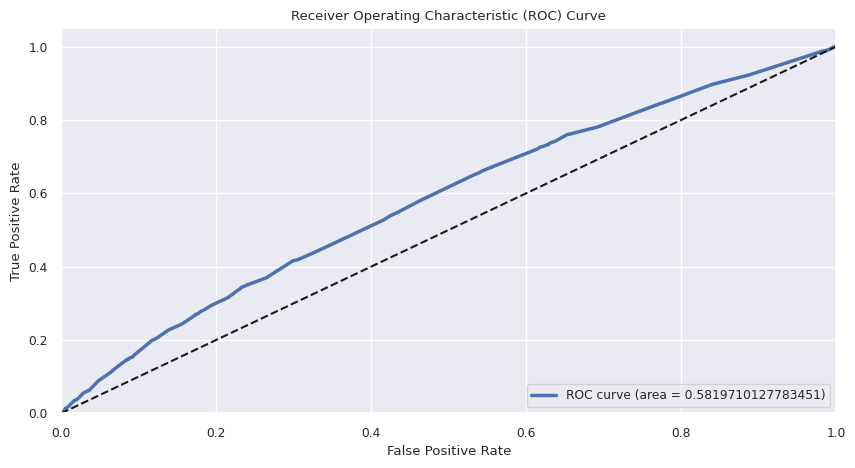

0.5819710127783451

In [421]:
accuracy = evaluation.get_performance(clf_preds, y_test)
evaluation.plot_roc(clf, y_test, X_test_fs)

In [279]:
#save the model
pickle.dump(clf, open('logistic_model.pkl', 'wb'))


##### RandomSearch with Logistic

In [460]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,random_state=0,class_weight="balanced")
distributions = dict(C=uniform(loc=0, scale=4),penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions,n_iter=10)
clf.fit(X_train, y_train.ravel())

RandomizedSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                                max_iter=200, random_state=0,
                                                solver='saga', tol=0.01),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f85899e00d0>,
                                        'penalty': ['l2', 'l1']})

In [461]:
res_logistic = pd.DataFrame(clf.cv_results_)
res_logistic

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.525172,0.079217,0.009027,0.010930,3.177578,l2,"{'C': 3.1775777065076776, 'penalty': 'l2'}",0.574329,0.562926,0.569184,0.559944,0.563282,0.565933,0.005157,7
1,0.488091,0.050350,0.003193,0.000203,3.532682,l2,"{'C': 3.5326815077354627, 'penalty': 'l2'}",0.574329,0.561813,0.569045,0.559944,0.563282,0.565683,0.005286,8
2,0.620016,0.045320,0.002965,0.000105,3.874922,l1,"{'C': 3.8749222485953254, 'penalty': 'l1'}",0.574051,0.564038,0.569740,0.564395,0.567038,0.567852,0.003719,1
3,0.530173,0.043121,0.002885,0.000188,1.462635,l1,"{'C': 1.4626349086700166, 'penalty': 'l1'}",0.573356,0.562648,0.569462,0.559805,0.566898,0.566434,0.004808,5
4,0.472747,0.064716,0.003663,0.001171,3.624761,l2,"{'C': 3.6247613295273147, 'penalty': 'l2'}",0.574329,0.561813,0.569045,0.559944,0.563282,0.565683,0.005286,8
5,0.575850,0.044381,0.003112,0.000263,2.290334,l1,"{'C': 2.2903341030597244, 'penalty': 'l1'}",0.573912,0.562787,0.569601,0.564256,0.566898,0.567491,0.003965,2
6,0.430749,0.069525,0.002888,0.000173,0.814969,l2,"{'C': 0.81496917844802, 'penalty': 'l2'}",0.573495,0.562509,0.570157,0.560779,0.567733,0.566934,0.004723,4
7,0.424448,0.026374,0.002965,0.000024,1.332334,l2,"{'C': 1.3323337805378386, 'penalty': 'l2'}",0.574329,0.562648,0.570157,0.560640,0.563700,0.566295,0.005128,6
8,0.553886,0.049466,0.003050,0.000076,2.771007,l1,"{'C': 2.7710070694267133, 'penalty': 'l1'}",0.573634,0.560701,0.569740,0.564256,0.566759,0.567018,0.004445,3
9,0.452080,0.046700,0.002996,0.000063,3.89984,l2,"{'C': 3.899839785358538, 'penalty': 'l2'}",0.574329,0.561813,0.569045,0.559944,0.563282,0.565683,0.005286,8


In [462]:
# logistic regression
clf.best_score_

0.5678523552369684

### RandomForest

#### Modeling

In [284]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
#class_weight={0:1, 1:3}
clfr = RandomForestClassifier(class_weight={0:1, 1:3})
distributions = dict(n_estimators=list(range(100,150,10)),max_depth=list(range(1,100,10)))
clfr = RandomizedSearchCV(clfr, distributions,cv=3,n_iter=9)
clfr.fit(X_train, y_train.ravel())
print("model score: %.3f" % clfr.score(X_val, y_val))

model score: 0.611


In [ ]:
# clfr = pickle.load(open('randomforest_model.pkl', 'rb'))
# clf_preds = clfr.predict(X_test)

In [285]:
clf_preds = clfr.predict(X_test)

In [286]:
res_logistic = pd.DataFrame(clfr.cv_results_)
res_logistic

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2.434468,0.148961,0.284731,0.001780,100,61,"{'n_estimators': 100, 'max_depth': 61}",0.629787,0.618909,0.621162,0.623286,0.004688,2
1,2.712069,0.126584,0.334377,0.017403,110,81,"{'n_estimators': 110, 'max_depth': 81}",0.628786,0.617240,0.618575,0.621533,0.005157,5
2,2.770119,0.223048,0.296132,0.006532,100,71,"{'n_estimators': 100, 'max_depth': 71}",0.623947,0.620327,0.620160,0.621478,0.001747,6
3,2.810216,0.098586,0.324399,0.017327,110,61,"{'n_estimators': 110, 'max_depth': 61}",0.628869,0.615654,0.619576,0.621367,0.005542,7
4,2.433977,0.065409,0.308088,0.019867,100,21,"{'n_estimators': 100, 'max_depth': 21}",0.631539,0.624666,0.619993,0.625400,0.004742,1
5,2.762818,0.039236,0.345474,0.011413,120,51,"{'n_estimators': 120, 'max_depth': 51}",0.627952,0.615905,0.623081,0.622312,0.004948,3
6,2.803585,0.467942,0.289710,0.007907,100,31,"{'n_estimators': 100, 'max_depth': 31}",0.623446,0.615320,0.622497,0.620421,0.003627,8
7,3.924873,0.367008,0.375852,0.010290,130,71,"{'n_estimators': 130, 'max_depth': 71}",0.628536,0.618909,0.619242,0.622229,0.004462,4
8,1.992842,0.485118,0.352987,0.288506,100,11,"{'n_estimators': 100, 'max_depth': 11}",0.595661,0.585614,0.578271,0.586515,0.007128,9


In [288]:
print("BestScore in Train: ",clfr.best_score_) #train
print("BestScore in Val: ",clfr.score(X_val, y_val)) # val

BestScore in Train:  0.6253996567805885
BestScore in Val:  0.6107634543178974


Model Performance metrics:
------------------------------
Accuracy: 0.6193050966256133
Precision: 0.7529698010591098
Recall: 0.7170505656262778
F1 Score: 0.7345713487852554

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.75      0.72      0.73      7337
           1       0.31      0.35      0.33      2650

    accuracy                           0.62      9987
   macro avg       0.53      0.53      0.53      9987
weighted avg       0.63      0.62      0.63      9987


Prediction Confusion Matrix:
------------------------------
      0     1
0  5261  2076
1  1726   924


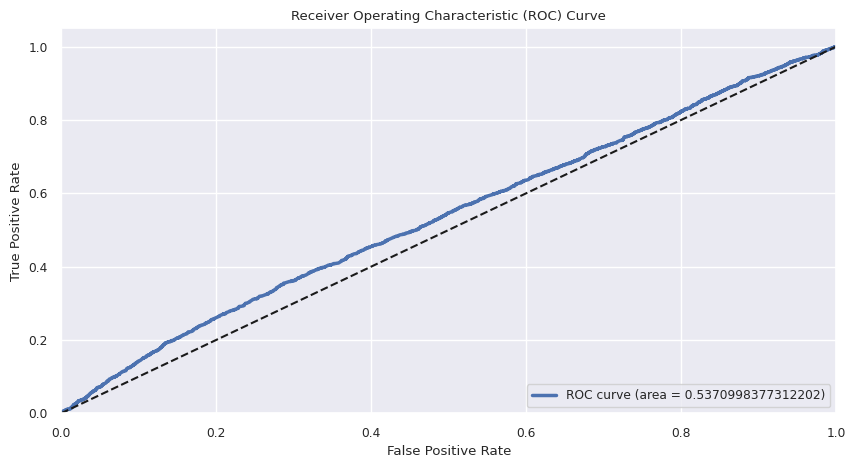

0.5370998377312202

In [289]:
clfr_preds = clfr.predict(X_test)
accuracy = evaluation.get_performance(clfr_preds, y_test)
evaluation.plot_roc(clfr, y_test, X_test)

In [290]:
#save the model
pickle.dump(clfr, open('randomforest_model.pkl', 'wb'))

#### Feature_Importance Gini by RF

In [302]:
# feature importance using RF
len(clfr.best_estimator_.feature_importances_)

31

In [305]:
targets = new_columns_name[:-1]

In [306]:
feat_list = []

total_importance = 0
# Print the name and gini importance of each feature
for feature in zip(targets, clfr.best_estimator_.feature_importances_):
    feat_list.append(feature)
    total_importance += feature[1]

included_feats = []
# Print the name and gini importance of each feature
for feature in zip(targets, clfr.best_estimator_.feature_importances_):
    if feature[1] > .05:
        included_feats.append(feature[0])

print('\n',"Cumulative Importance =", total_importance)

# create DataFrame using data
df_imp = pd.DataFrame(feat_list, columns =['FEATURE', 'IMPORTANCE']).sort_values(by='IMPORTANCE', ascending=False)
df_imp['CUMSUM'] = df_imp['IMPORTANCE'].cumsum()
df_imp


 Cumulative Importance = 1.0


,FEATURE,IMPORTANCE,CUMSUM
29,transform_num__QUANT_DEPENDANTS,0.173084,0.173084
30,transform_num__MONTHS_IN_RESIDENCE,0.128387,0.301471
21,transform_bin__COMPANY,0.066740,0.368211
19,transform_bin__SEX,0.063049,0.431259
25,transform_bin__FLAG_CARDS,0.057911,0.489170
22,transform_bin__FLAG_PROFESSIONAL_PHONE,0.055264,0.544434
23,transform_bin__PAYMENT_DAY,0.037856,0.582290
20,transform_bin__FLAG_RESIDENCIAL_PHONE,0.032699,0.614989
14,transform_cat__MONTHLY_INCOMES_TOT_[0-650],0.031582,0.646570
17,transform_cat__MONTHLY_INCOMES_TOT_[650-1320],0.030487,0.677057


### Oversampling
It can be achieved in two ways: random oversampling and synthetic oversampling.


#### Aplicando SMOTE oversampling (syntethic oversampling)

new synthetic training records are made randomly by selecting one or more K-nearest neighbors for each of the minority classes

- Draw a random set from the minority class.
- For all the observations for the sample, locate the K-nearest neighbors. To obtain the distance between the neighbors, find the Euclidean distance.
- The next step is to find the vector between the current data point and the selected neighbor.
- Next, multiply a vector between 0 and 1.

To obtain the new dataset, add new samples to the current data point.
The only downfall of oversampling is that it can lead to overfitting due to duplication of the same information



In [291]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
print('Original dataset shape %s' % Counter(y_train.ravel()))


model_chosen = LogisticRegression(max_iter=200,class_weight="balanced")
#model_chosen = RandomForestClassifier(max_depth=61, n_estimators=100, class_weight="balanced")
# pipeline
# 1:2 ratio
over = SMOTE(sampling_strategy=0.4, k_neighbors=10)
# 1:10 ratio
under = RandomUnderSampler(sampling_strategy=0.9)
steps = [("over",over),("under",under)]
pipeline = Pipeline(steps=steps)

# # transform the dataset
X_train_new, y_train_new = pipeline.fit_resample(X_train, y_train)
# summarize the new class distribution
print('New dataset shape %s' % Counter(y_train_new.ravel()))

# define model
model = model_chosen
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_train_new, y_train_new, scoring='roc_auc', cv=cv, n_jobs=-1)
score = np.mean(scores)
print("Mean ROC AUC: %.3f"%(score))
# k_values = list(range(5,10))
# for k in k_values:
#     model = model_chosen
#     # pipeline
#     # 1:2 ratio
#     over = SMOTE(sampling_strategy=0.4, k_neighbors=k)
#     # 1:10 ratio
#     under = RandomUnderSampler(sampling_strategy=0.9)
#     steps = [("over",over),("under",under),("model",model)]
#     pipeline = Pipeline(steps=steps)
#     # evaluate pipeline
#     cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
#     scores  = cross_val_score(pipeline, X_train, y_train,scoring="roc_auc",cv=cv, n_jobs=-1)
#     score = np.mean(scores)
#     print("> k=%d, Mean ROC AUC: %.6f"%(k,score))

Original dataset shape Counter({0.0: 26629, 1.0: 9324})
New dataset shape Counter({0.0: 11834, 1.0: 10651})
Mean ROC AUC: 0.587


#### Over Under RandomForest

In [292]:
model.fit(X_train_new, y_train_new.ravel())

LogisticRegression(class_weight='balanced', max_iter=200)

0.5824780976220275
Model Performance metrics:
------------------------------
Accuracy: 0.5604285571242615
Precision: 0.7796545834124122
Recall: 0.5599018672481941
F1 Score: 0.6517531334285261

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.78      0.56      0.65      7337
           1       0.32      0.56      0.40      2650

    accuracy                           0.56      9987
   macro avg       0.55      0.56      0.53      9987
weighted avg       0.66      0.56      0.59      9987


Prediction Confusion Matrix:
------------------------------
      0     1
0  4108  3229
1  1161  1489


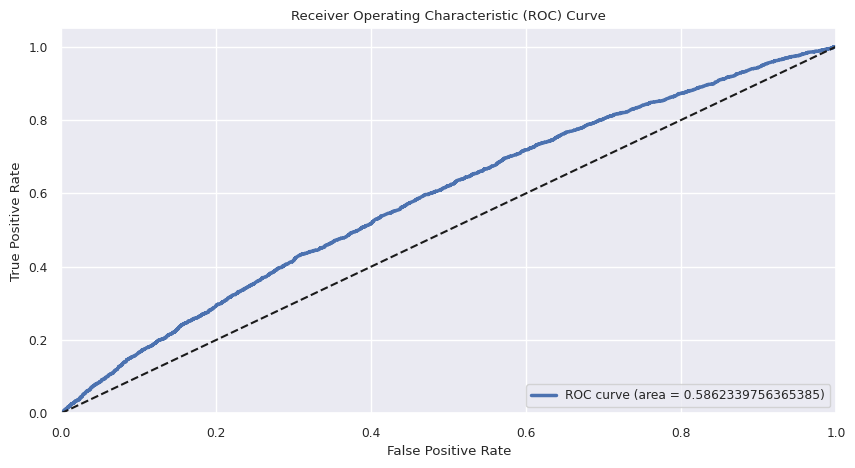

0.5862339756365385

In [293]:
print(model.score(X_val, y_val))
clfr_preds = model.predict(X_test)
accuracy = evaluation.get_performance(clfr_preds, y_test)
evaluation.plot_roc(model, y_test, X_test)

#### Feature Selection

two options:
- chi-squared statistic
- mutual information statistic.

-  Chi-squared statistic
-  The results of this test can be used for feature selection, where those features that are independent of the target variable can be removed from the dataset.

##### Chi-Squared Feature Selection

In [378]:
newl_columns_name = list(new_columns_name)

In [379]:
newl_columns_name = newl_columns_name[:-3]

In [400]:
X_val.shape

(3995, 31)

In [401]:
y_val.shape

(3995, 1)

In [417]:
#select only categoricas

# feature selection
def select_features_by_chi2(X_tr, y_tr, X_va,X_te):
    fs = SelectKBest(score_func=chi2, k=10)
    #fs = SelectPercentile(chi2, percentile=50)
    fs.fit(X_tr, y_tr)
    X_train_fs = fs.transform(X_tr)
    X_val_fs = fs.transform(X_va)
    X_test_fs = fs.transform(X_te)
    return X_train_fs, X_val_fs, X_test_fs, fs

X_train_fs, X_val_fs, X_test_fs, fs = select_features_by_chi2(X_train[:,:-2], y_train, X_val[:,:-2],X_test[:,:-2])
# what are scores for the features
fs_scores = pd.DataFrame(fs.scores_,columns=["FS_SCORE"],index=newl_columns_name)
fs_sorted_scores = fs_scores.sort_values(by="FS_SCORE",ascending=False)
fs_sorted_scores
# fs_sorted = np.sort(fs.scores_)[::-1]
# print(fs_sorted)
# for i in range(len(fs.scores_)):
#     print("Feature %d: %f" % (i, fs.scores_[i]))
# names = ["feature"+str(i) for i in range(len(fs.scores_))]
# x = list(range(len(fs.scores_)))
# plt.figure(figsize=(8,3))
# plt.title("FI with Chi-Squared Feature Selection")
# plt.bar(x, fs.scores_)
# plt.xticks(x, names, rotation='vertical')
# plt.tight_layout()
# plt.show()


,FS_SCORE
transform_bin__PAYMENT_DAY,132.498941
transform_cat__MARITAL_STATUS_single,102.741837
transform_cat__MARITAL_STATUS_married,34.964894
transform_cat__RESIDENCE_TYPE_mortgage,23.982828
transform_bin__FLAG_RESIDENCIAL_PHONE,20.242670
transform_cat__MONTHLY_INCOMES_TOT_[3323-8560],12.453331
transform_cat__MARITAL_STATUS_Other,10.751988
transform_cat__APPLICATION_SUBMISSION_TYPE_Other,9.964806
transform_cat__APPLICATION_SUBMISSION_TYPE_Carga,9.825821
transform_bin__SEX,8.736977


In [409]:
X_val.shape

(3995, 31)

In [404]:
X_val_fs.shape

(9987, 14)

In [391]:
X_train_fs.shape

(35953, 14)

In [377]:
len(fs_sorted_scores)

29

In [331]:
list(new_columns_name[-3:])

['transform_num__QUANT_DEPENDANTS',
 'transform_num__MONTHS_IN_RESIDENCE',
 'remainder__TARGET_LABEL_BAD=1']

In [332]:
number_cols_prep = pd.DataFrame(np.hstack((X_train[:,-2:],y_train)),columns=list(new_columns_name[-3:]))

In [333]:
# 2 es la ultima
number_cols_prep.corr()

,transform_num__QUANT_DEPENDANTS,transform_num__MONTHS_IN_RESIDENCE,remainder__TARGET_LABEL_BAD=1
transform_num__QUANT_DEPENDANTS,1.000000,0.078295,0.009672
transform_num__MONTHS_IN_RESIDENCE,0.078295,1.000000,0.015130
remainder__TARGET_LABEL_BAD=1,0.009672,0.015130,1.000000


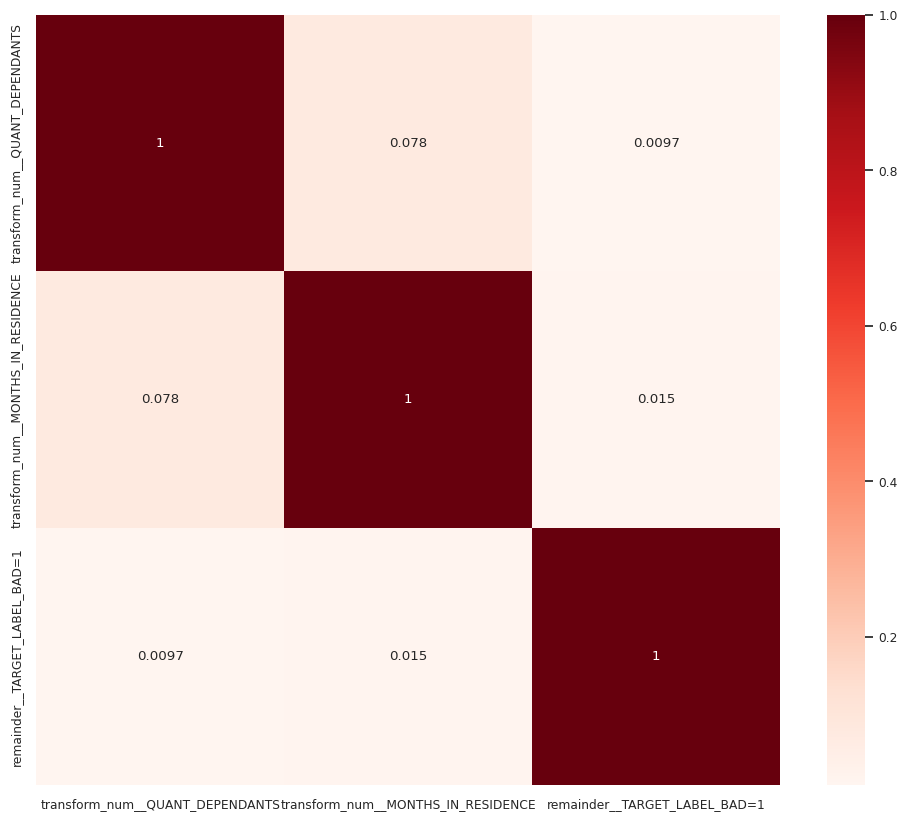

In [334]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = number_cols_prep.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [337]:
new_columns_name[-1:][0]

'remainder__TARGET_LABEL_BAD=1'

In [342]:
#Correlation with output variable
cor_target = abs(cor[new_columns_name[-1:][0]])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.01]
relevant_features

transform_num__MONTHS_IN_RESIDENCE    0.01513
remainder__TARGET_LABEL_BAD=1         1.00000
Name: remainder__TARGET_LABEL_BAD=1, dtype: float64

In [345]:
app_train_set[["QUANT_DEPENDANTS","MONTHS_IN_RESIDENCE","TARGET_LABEL_BAD=1"]].corr()

,QUANT_DEPENDANTS,MONTHS_IN_RESIDENCE,TARGET_LABEL_BAD=1
QUANT_DEPENDANTS,1.000000,0.078295,0.009672
MONTHS_IN_RESIDENCE,0.078295,1.000000,0.015130
TARGET_LABEL_BAD=1,0.009672,0.015130,1.000000
